In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [73]:
# Load the CSV files8
person1_df_normal = pd.read_csv(r"G:\Academic Folders\FYP\walking_final\normal_walk_1.csv")
person1_df_abn = pd.read_csv(r'G:\Academic Folders\FYP\walking_final\abnormal_walk_1.csv')

#person1_df_normal = pd.read_csv(r"G:\Academic Folders\FYP\Person6\Normal.csv")
#person1_df_abn = pd.read_csv(r'G:\Academic Folders\FYP\Person6\Abnormal.csv')
#person3_df = pd.read_csv('person3_walking.csv')

In [74]:
# Preprocess the data
# Assume that the CSV files have the same column names and order
person1_data_nor = np.array(person1_df_normal)
person1_data_abn = np.array(person1_df_abn)
#person3_data = np.array(person3_df)


In [75]:
type(person1_data_nor)

numpy.ndarray

In [76]:
# Define the sequence model
#model = Sequential()
#model.add(LSTM(64, input_shape=(None, person1_data_nor.shape[1])))
#model.add(Dense(1))

In [77]:
# Compile the model
#model.compile(loss='mse', optimizer='adam')

In [78]:
# Concatenate the data and split it into training and test sets
#X = np.concatenate([person1_data, person2_data, person3_data])
#y = np.concatenate([np.zeros(person1_data.shape[0]), np.ones(person2_data.shape[0]), np.full(person3_data.shape[0], 2)])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
num_rows = len(person1_df_normal)
print(num_rows)

1226


In [80]:
#person1_df_normal = pd.read_csv('your_file.csv')
column_name = 'Plane_to_Head_distance'

# Sort the DataFrame by the column containing the values you want to remove in ascending order.
df_sorted = person1_df_normal.sort_values(by=column_name)

# Identify the index labels of the lowest 100 values
index_to_drop = df_sorted.head(int(num_rows*0.2)).index

# Drop the lowest 100 rows using the identified index labels
df_dropped = person1_df_normal.drop(index_to_drop)

# Save the updated DataFrame to a new CSV file
df_dropped.to_csv('updated_file7.csv', index=False)

new_normal_df = pd.read_csv(r"updated_file7.csv")

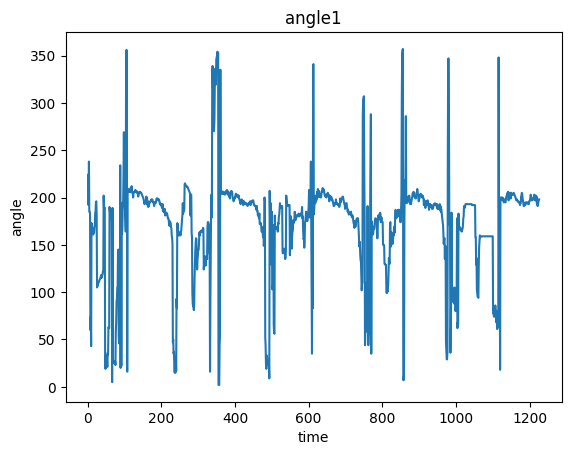

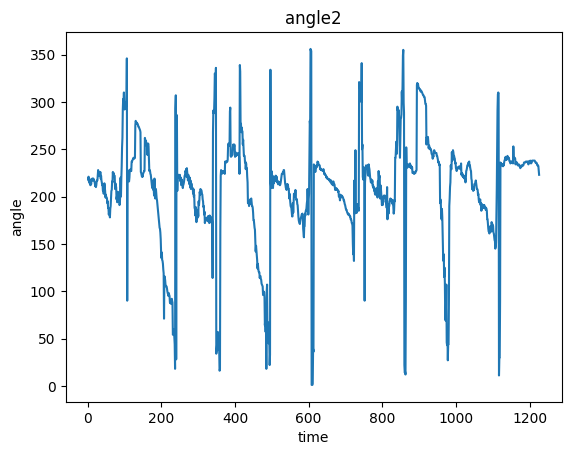

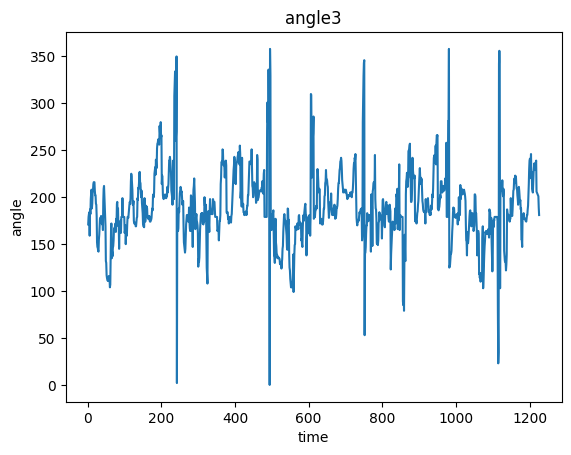

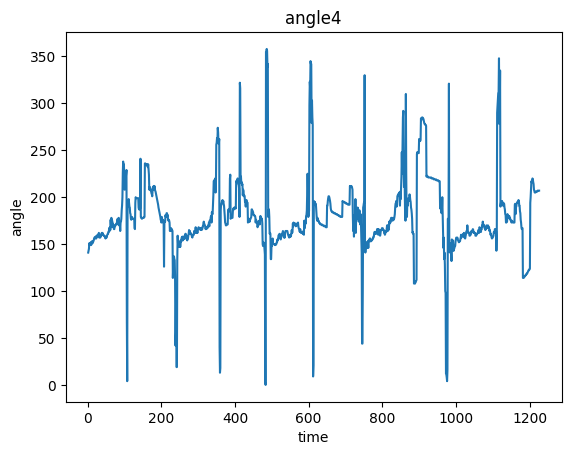

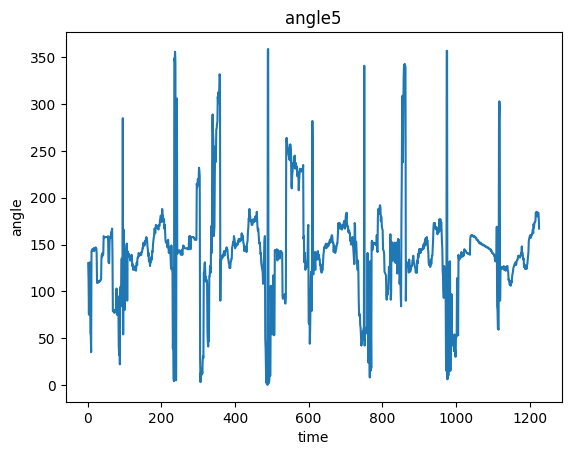

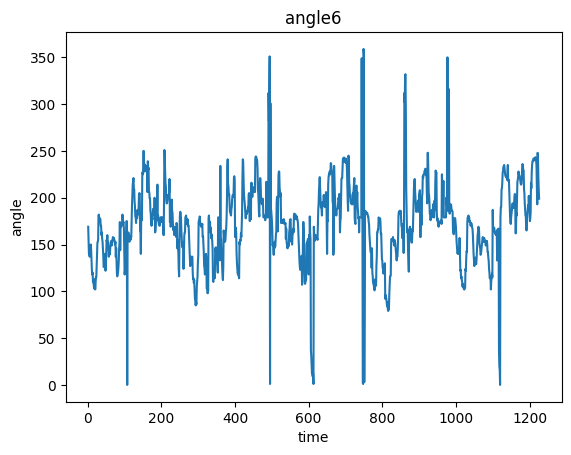

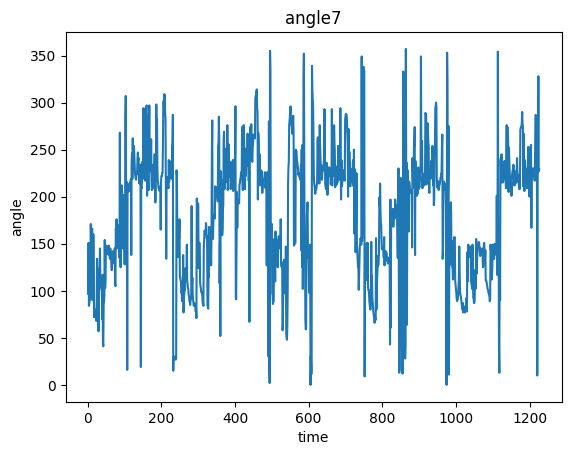

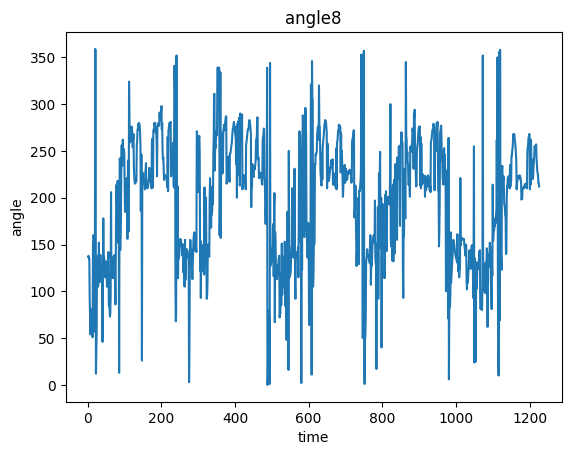

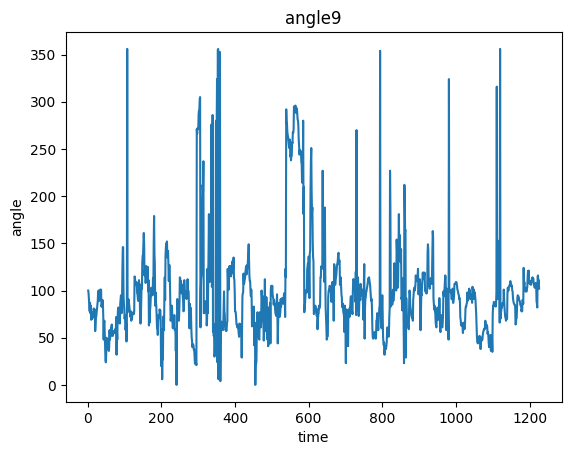

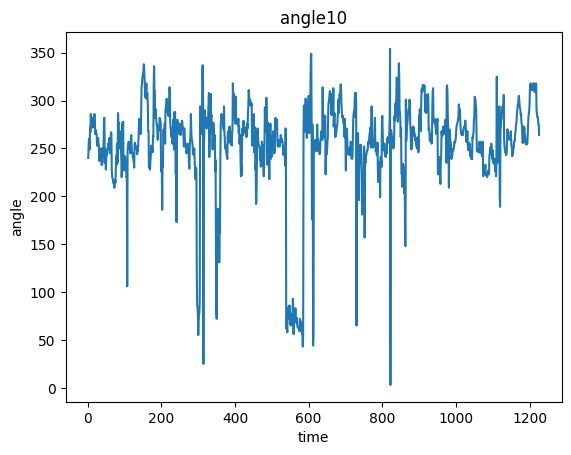

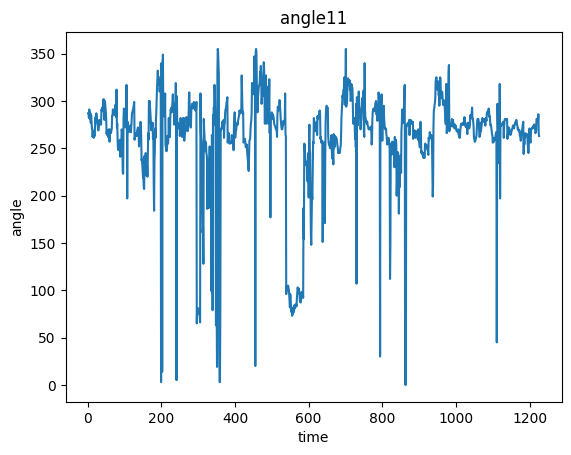

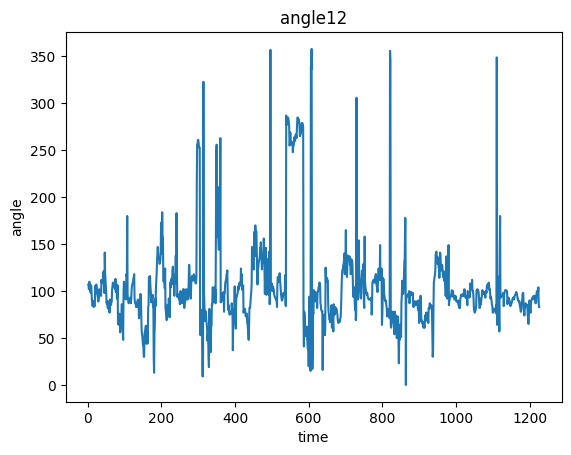

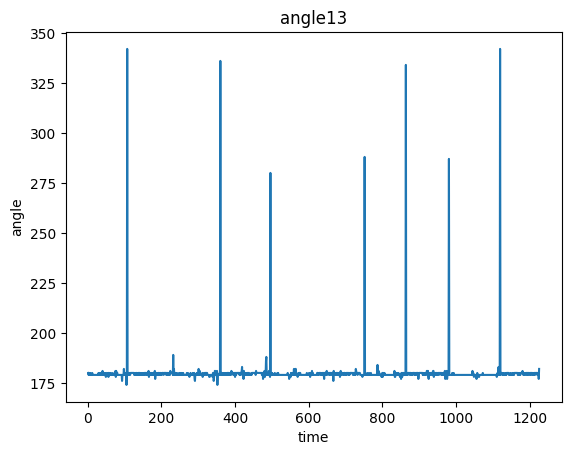

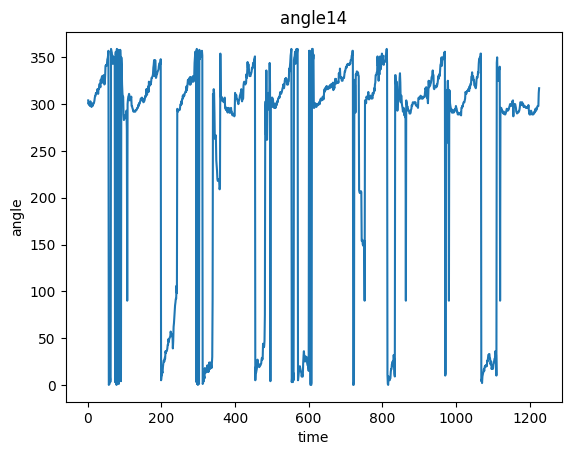

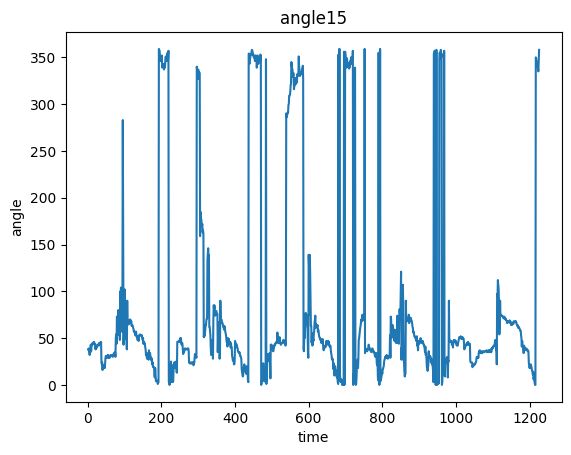

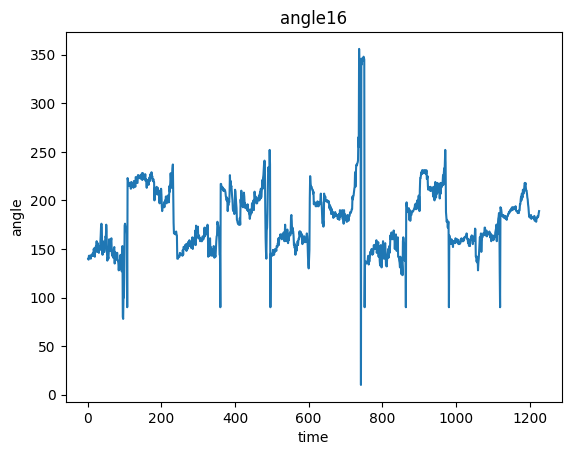

In [81]:
# Plot the data using matplotlib
for columns in ["angle1","angle2","angle3","angle4","angle5","angle6","angle7","angle8","angle9","angle10","angle11","angle12","angle13","angle14","angle15","angle16"]:
    plt.plot(person1_df_normal['count'], person1_df_normal[columns])
    plt.title(columns)
    plt.ylabel('angle')
    plt.xlabel('time')
    plt.show()

# After reducing larger noises (by considering the heights)

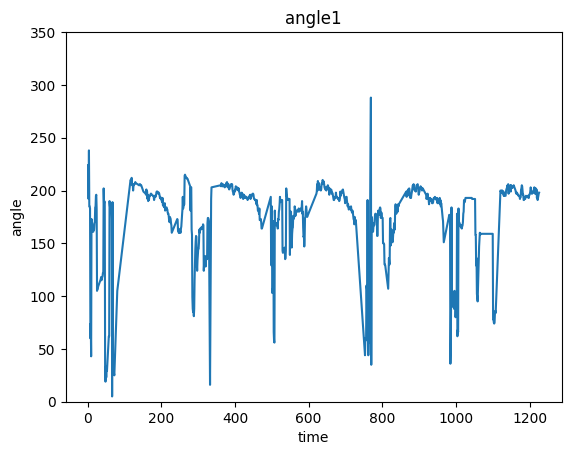

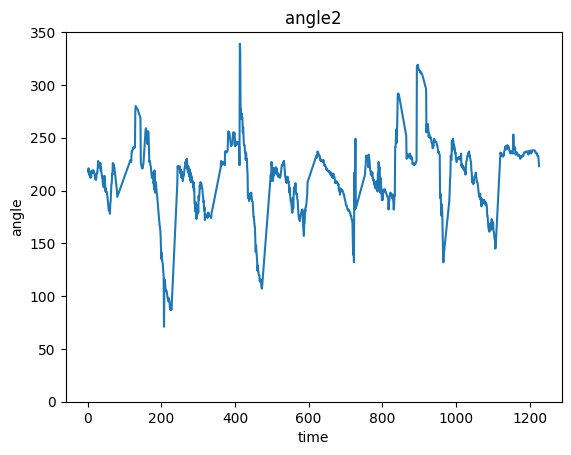

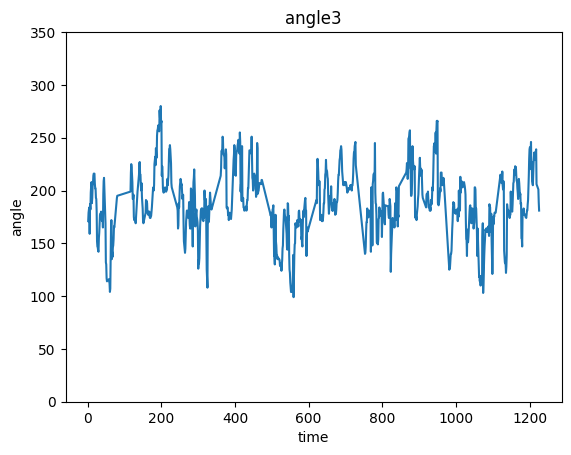

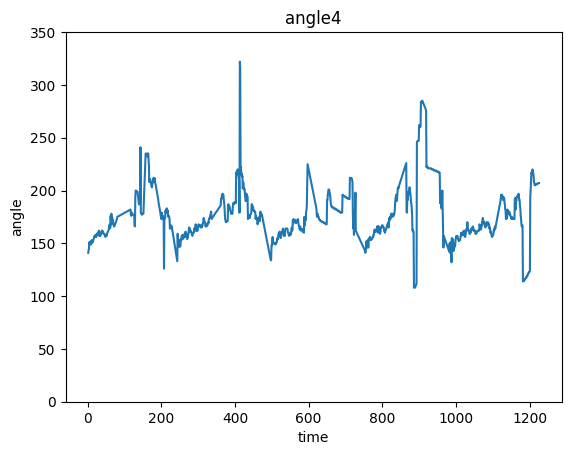

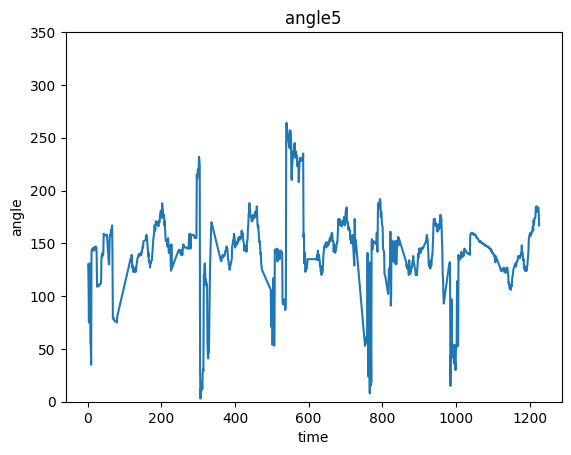

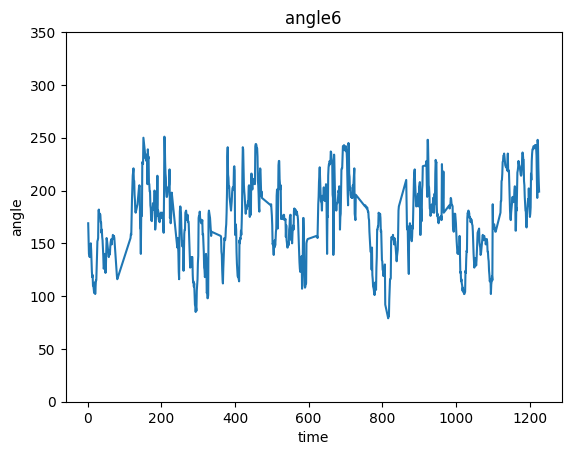

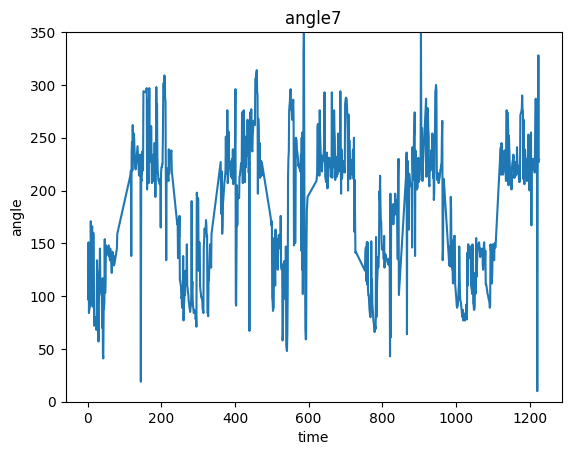

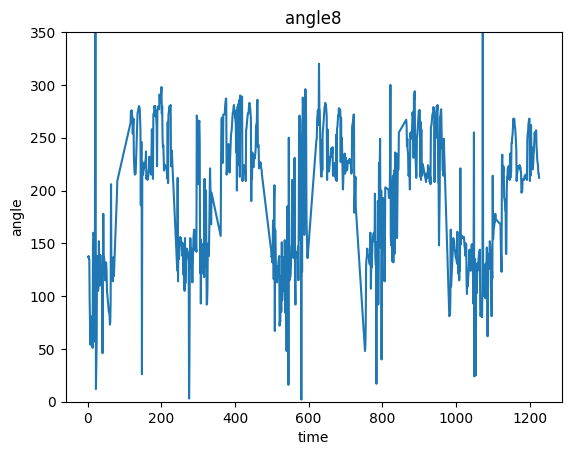

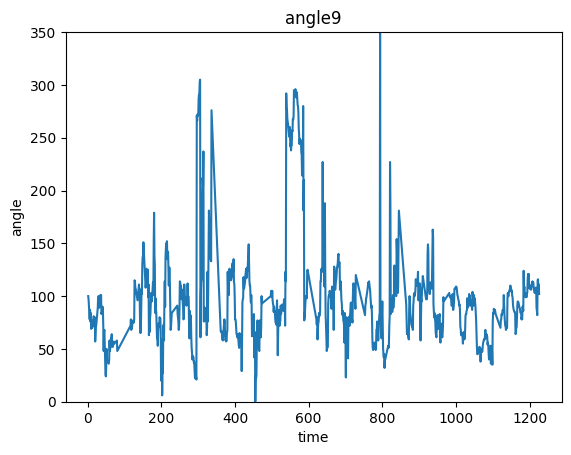

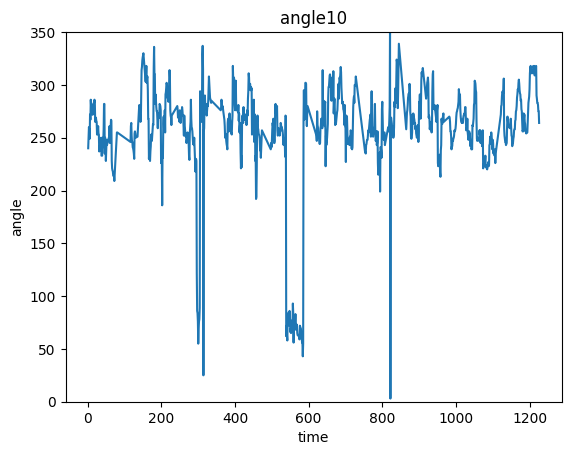

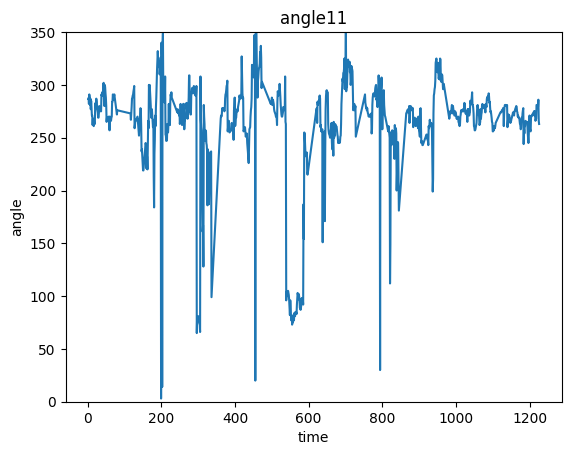

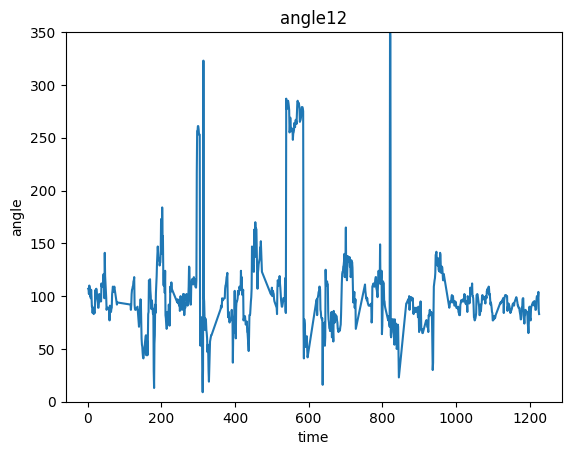

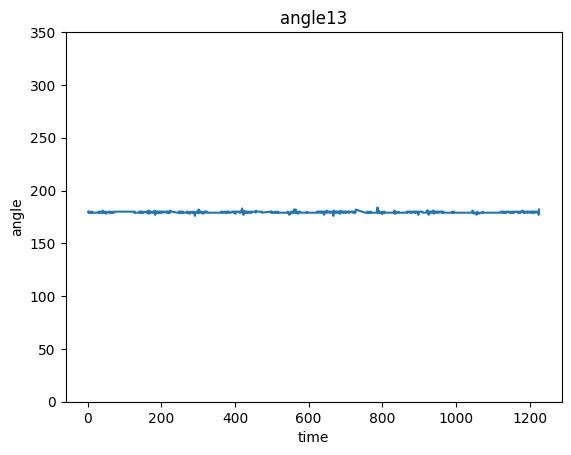

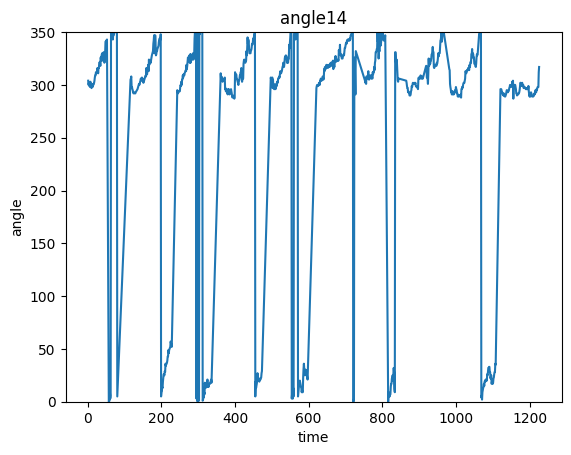

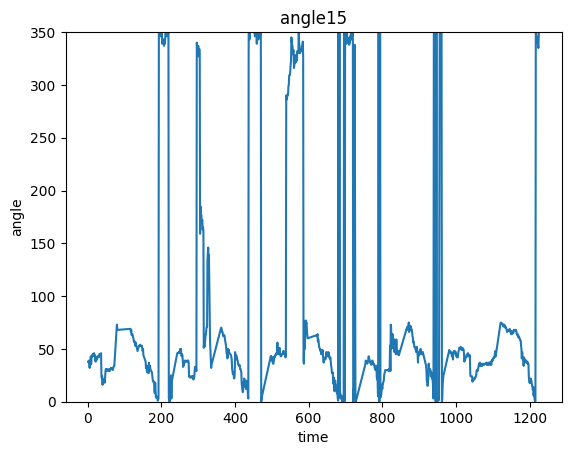

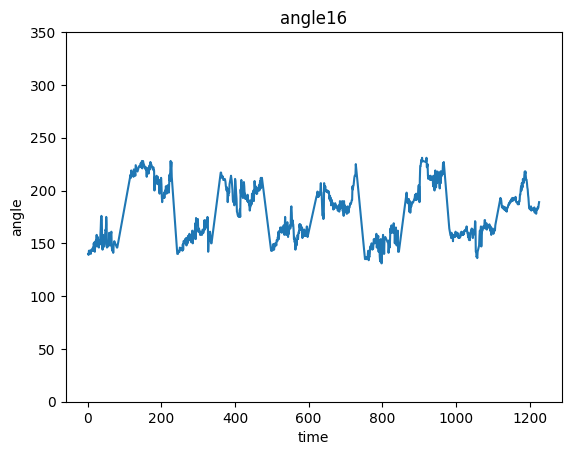

In [82]:
for columns in ["angle1","angle2","angle3","angle4","angle5","angle6","angle7","angle8","angle9","angle10","angle11","angle12","angle13","angle14","angle15","angle16"]:
    plt.plot(new_normal_df['count'], new_normal_df[columns])
    plt.title(columns)
    plt.xlabel('time')
    plt.ylabel('angle')
    plt.ylim(0,350)
    plt.show()

# Adding angular velocities to the csv files

In [83]:
#intAngle3 = int("angle3")
grad = np.gradient(person1_df_normal["angle3"],1/30)
print(grad)
# add the gradient to the data as a new column
person1_df_normal['Gradient'] = grad
print(len(person1_df_normal))
print(len(grad))

# save the data to a new CSV file
person1_df_normal.to_csv('new_data2.csv', index=False)

[ 240.  165.   75. ... -195. -300. -240.]
1226
1226


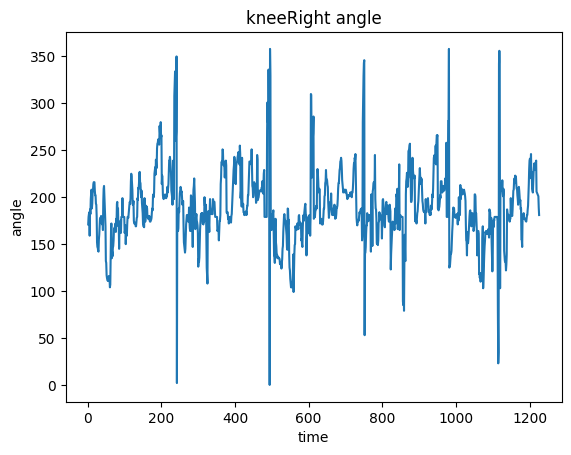

In [84]:
# Plot the data using matplotlib
plt.plot(person1_df_normal['count'], person1_df_normal['angle3'])
plt.title('kneeRight angle')
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

# #getting mode for each 10 rows

In [85]:
#getting mode for each 10 rows
df=person1_df_normal.iloc[1:]
groups = df.groupby(df.index // 10)
modes = groups.apply(lambda x: x.mode().iloc[0])
modes.to_csv('modes_file2.csv', index=False)


In [86]:
df_temp = pd.read_csv(r"modes_file2.csv")

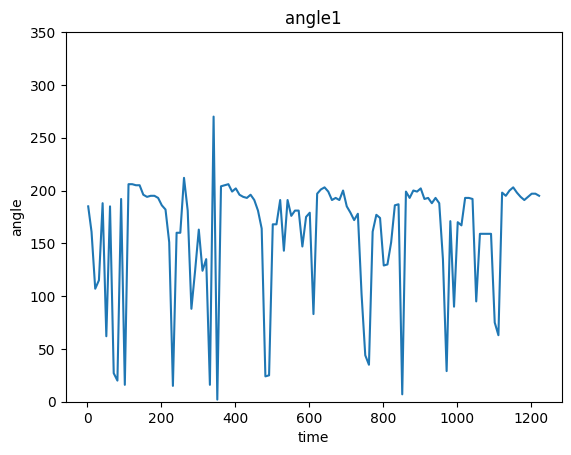

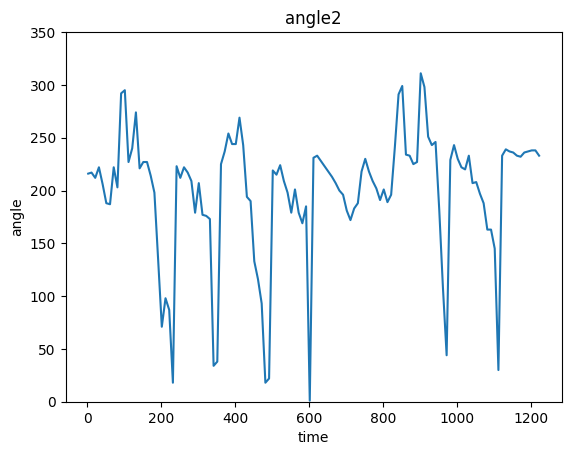

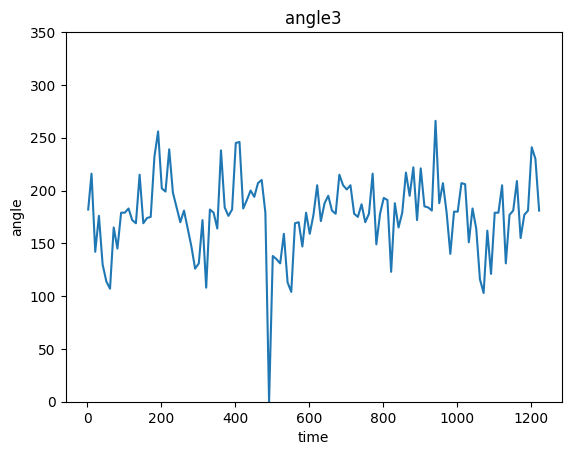

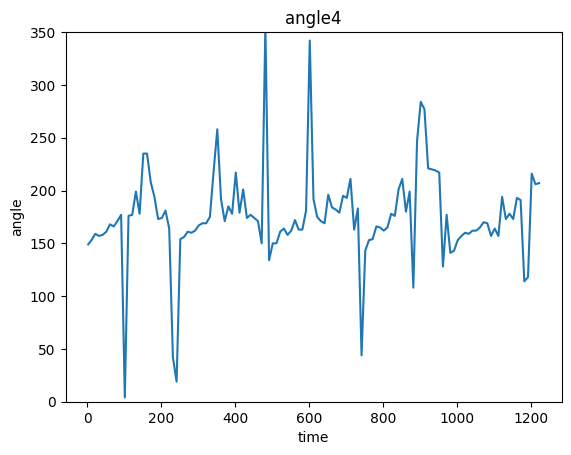

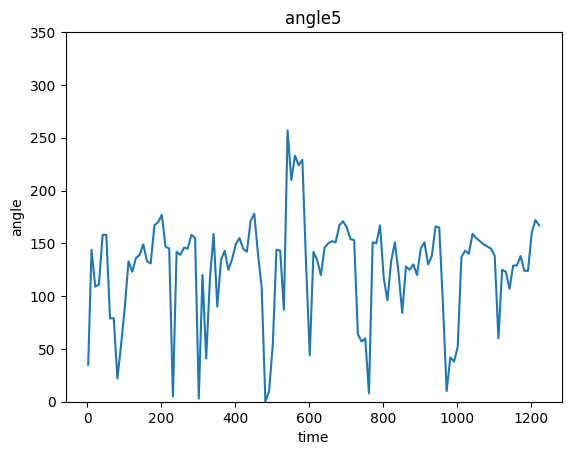

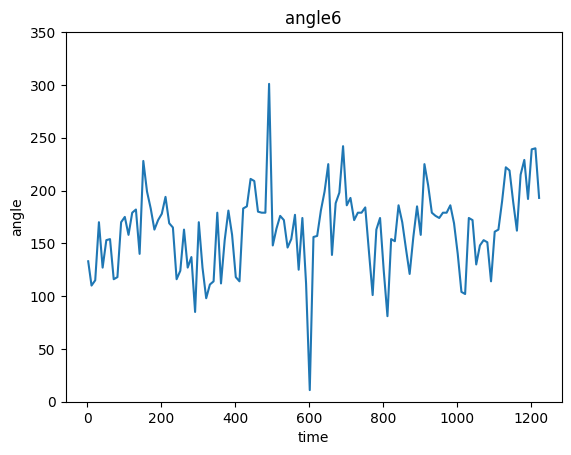

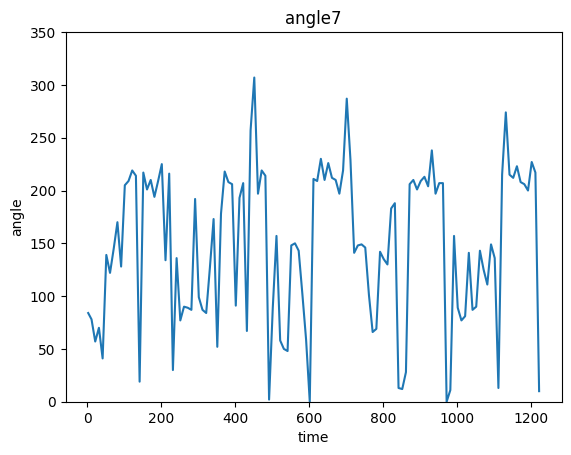

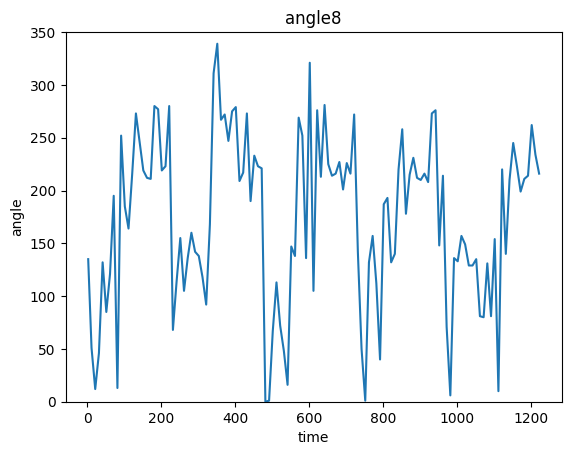

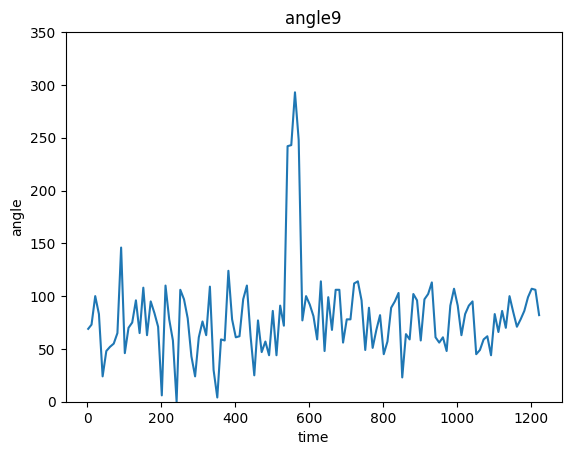

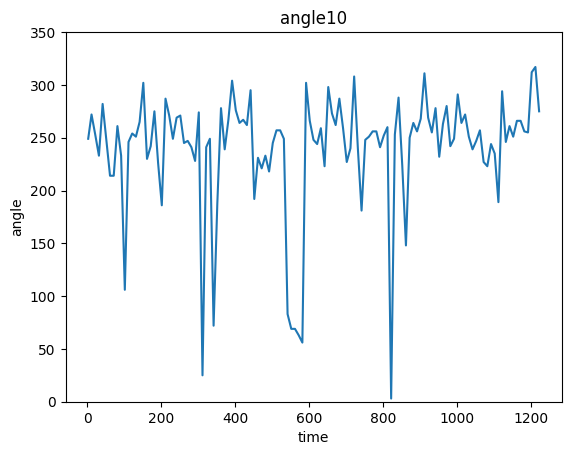

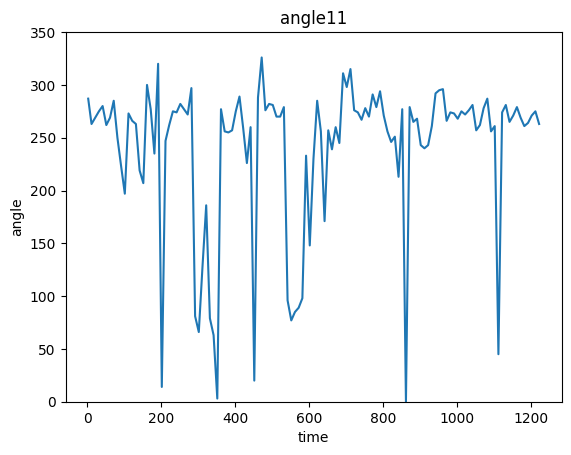

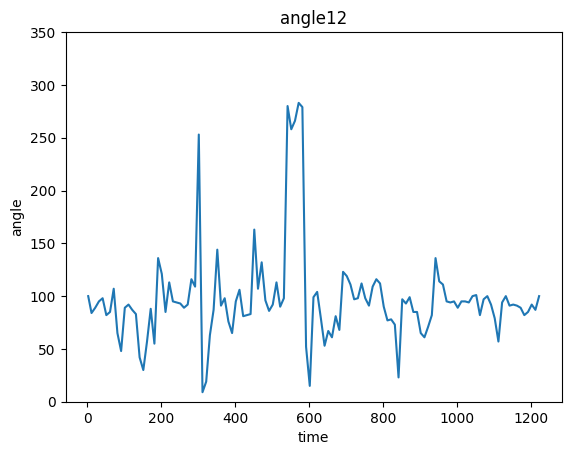

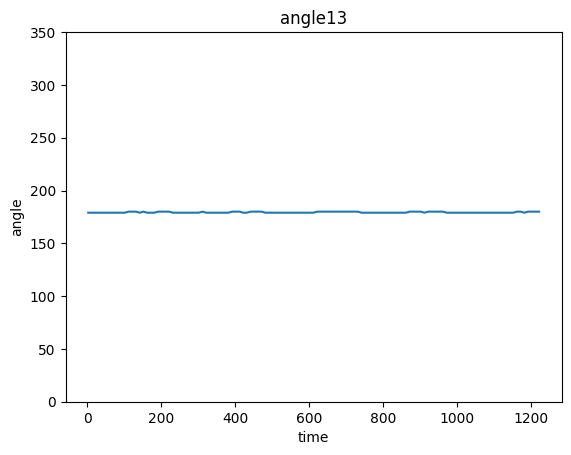

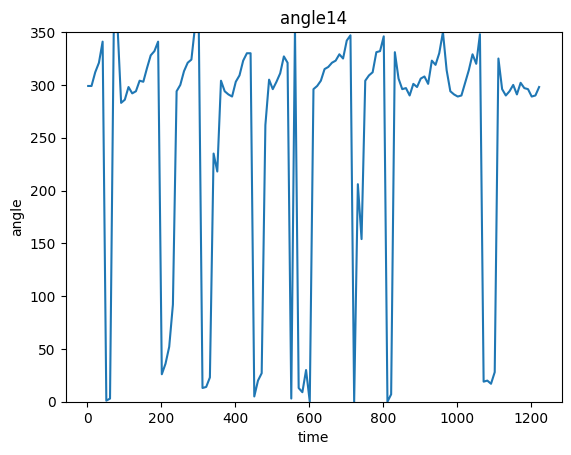

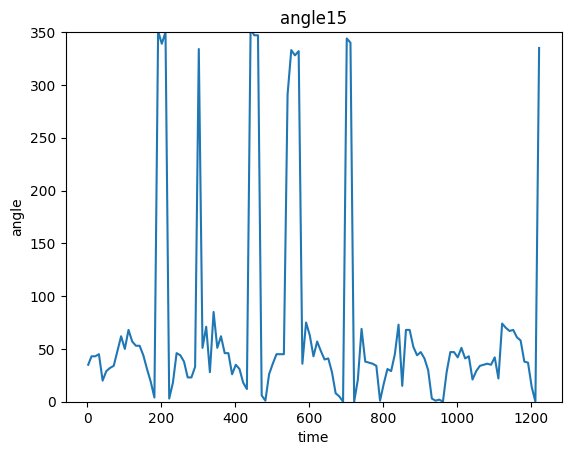

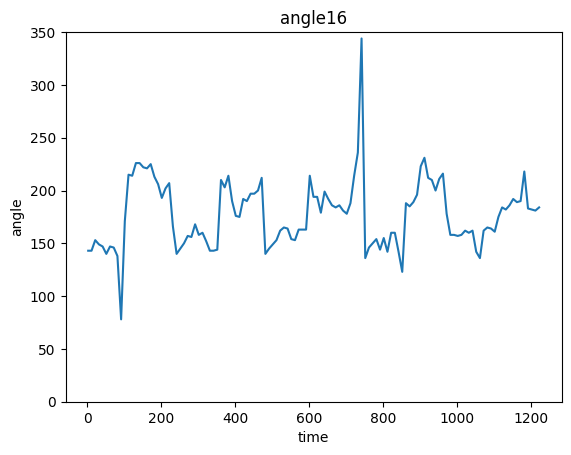

In [90]:
# plot graphs after taking mode values
for columns in ["angle1","angle2","angle3","angle4","angle5","angle6","angle7","angle8","angle9","angle10","angle11","angle12","angle13","angle14","angle15","angle16"]:
    plt.plot(df_temp['count'], df_temp[columns])
    plt.title(columns)
    plt.ylabel('angle')
    plt.xlabel('time')
    plt.ylim(0,350)
    plt.show()

In [88]:
#remove larger noises after taking mod value
num_rows = len(df_temp)
column_name = 'Plane_to_Head_distance'

# Sort the DataFrame by the column containing the values you want to remove in ascending order.
df_sorted2 = df_temp.sort_values(by=column_name)

# Identify the index labels of the lowest 100 values
index_to_drop = df_sorted2.head(int(num_rows*0.2)).index

# Drop the lowest 100 rows using the identified index labels
df_dropped = df_temp.drop(index_to_drop)

# Save the updated DataFrame to a new CSV file
df_dropped.to_csv('updated_file6.csv', index=False)

new_normal_df = pd.read_csv(r"updated_file6.csv")

# after taking mode values and remove larger noises

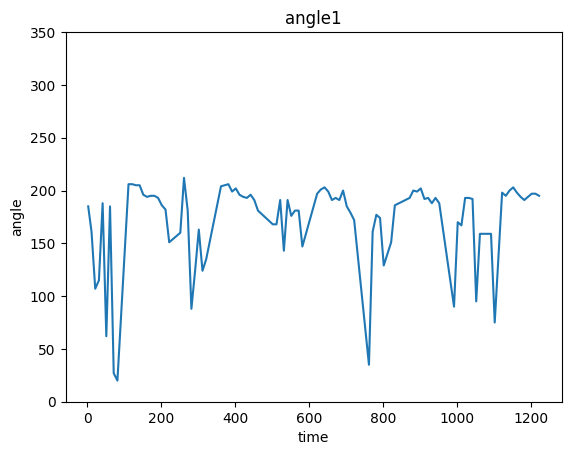

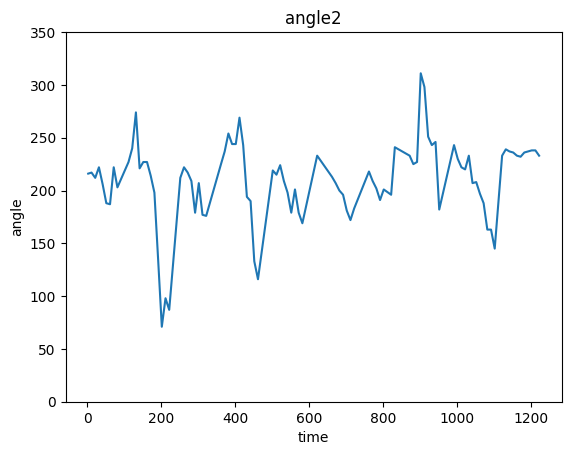

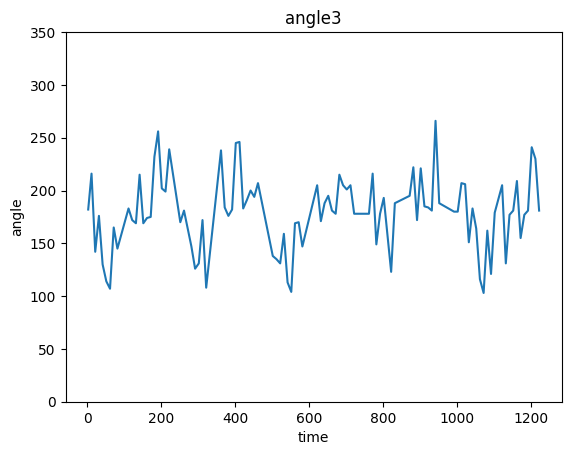

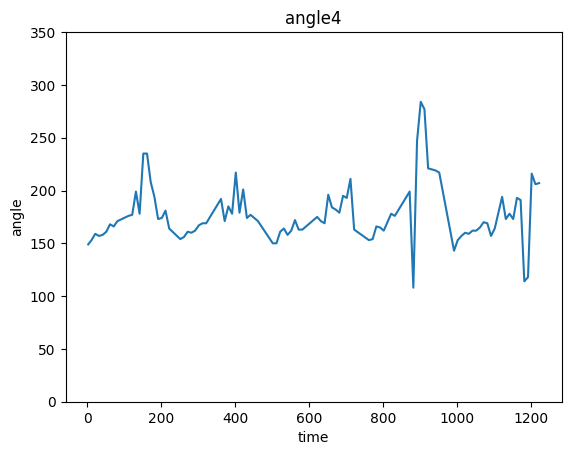

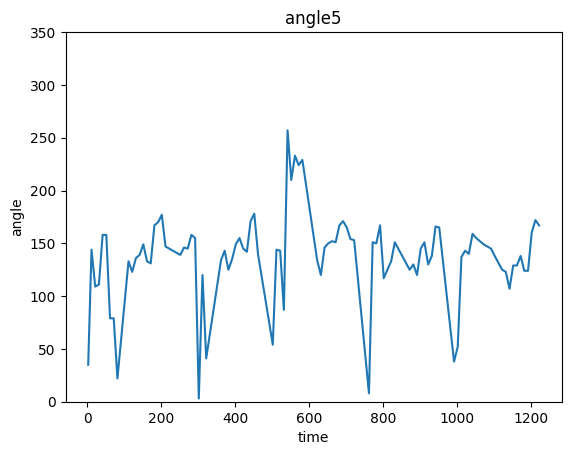

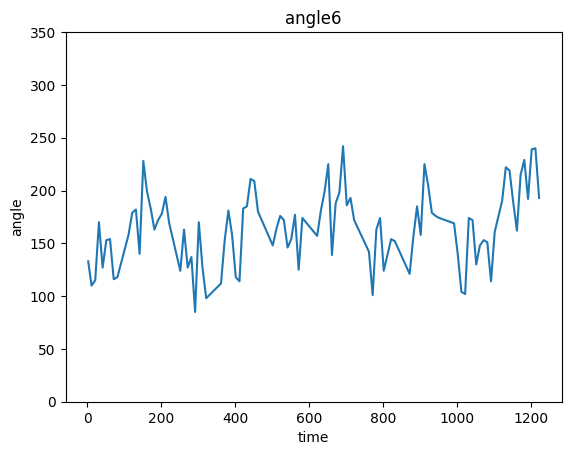

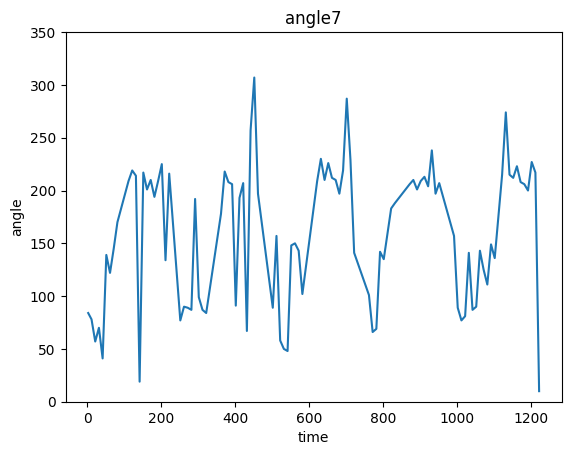

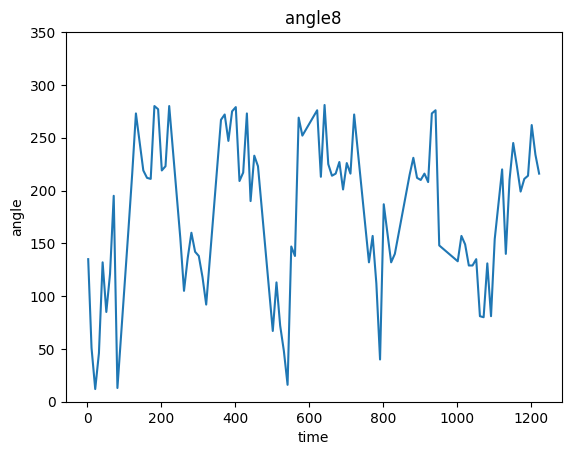

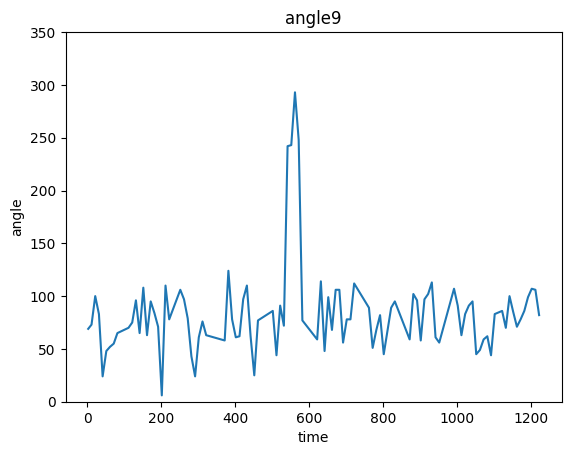

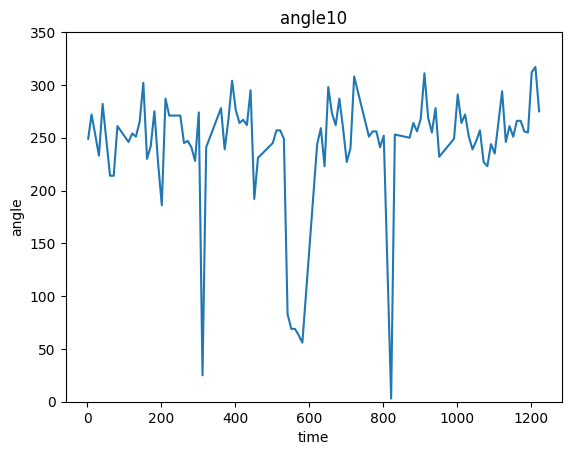

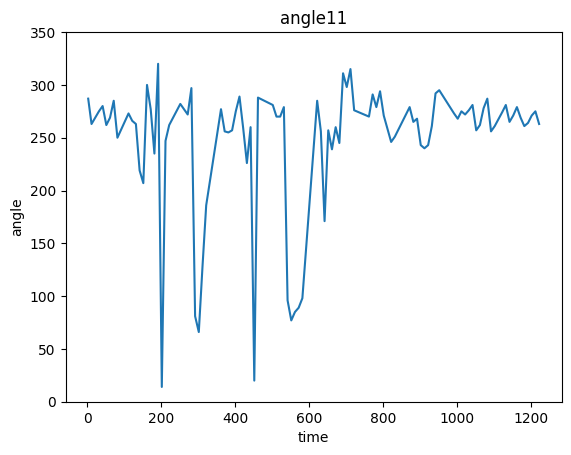

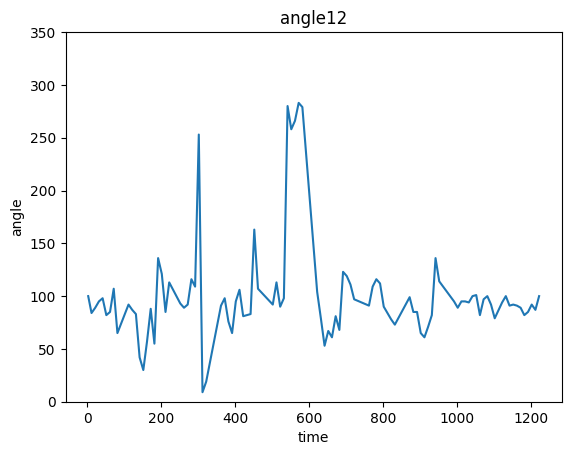

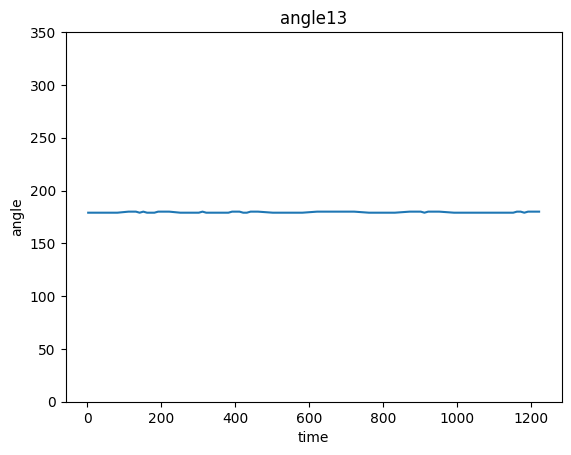

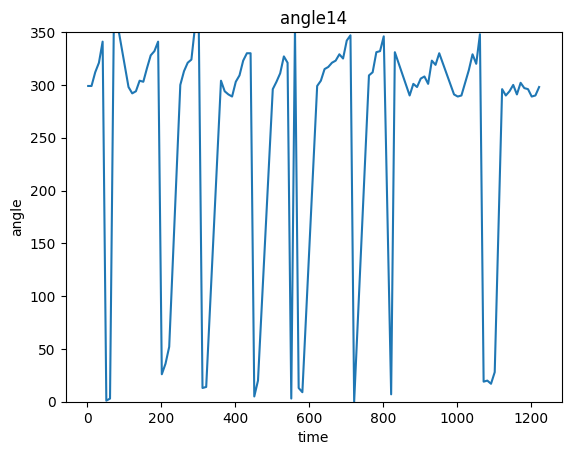

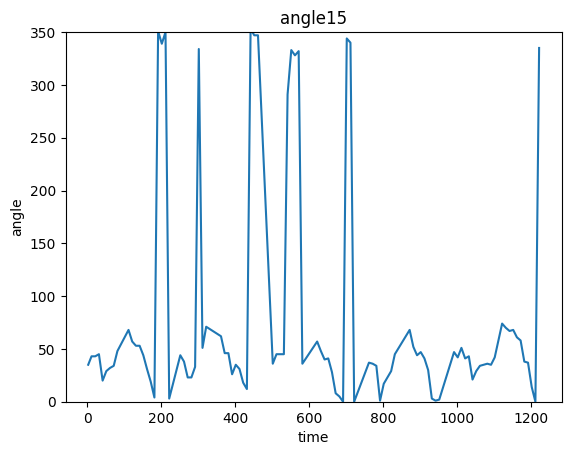

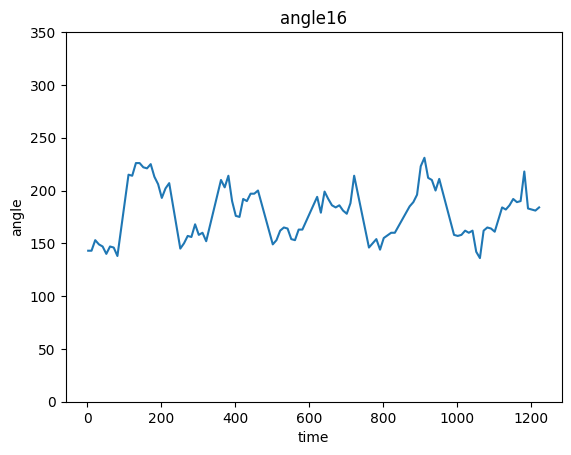

In [89]:

for columns in ["angle1","angle2","angle3","angle4","angle5","angle6","angle7","angle8","angle9","angle10","angle11","angle12","angle13","angle14","angle15","angle16"]:
    plt.plot(new_normal_df['count'], new_normal_df[columns])
    plt.title(columns)
    plt.xlabel('time')
    plt.ylabel('angle')
    plt.ylim(0,350)
    plt.show()

# Moving average filter

In [122]:
df = pd.read_csv(r"G:\Academic Folders\FYP\walking_final\normal_walk_1.csv")
window_size = 10

# Select only the numeric columns of the DataFrame
df_numeric = df.select_dtypes(include='number')

# Apply the rolling mean filter to each numeric column of the DataFrame
df_filtered = df_numeric.rolling(window_size).mean()



# Write the filtered data to a new CSV file
df_filtered.to_csv('filtered_data7.csv', index=False)

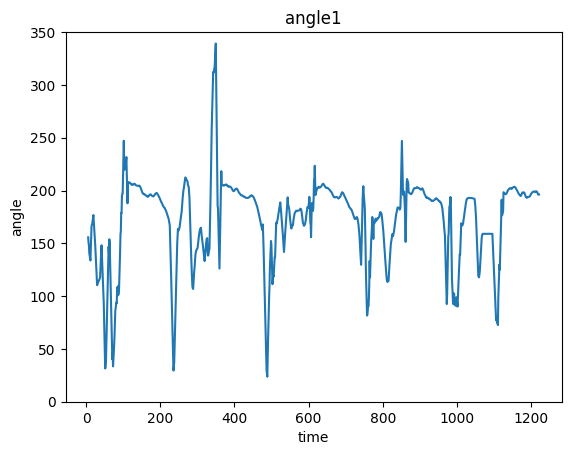

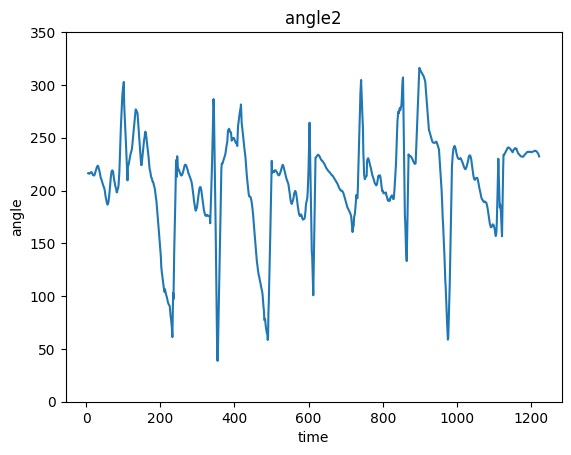

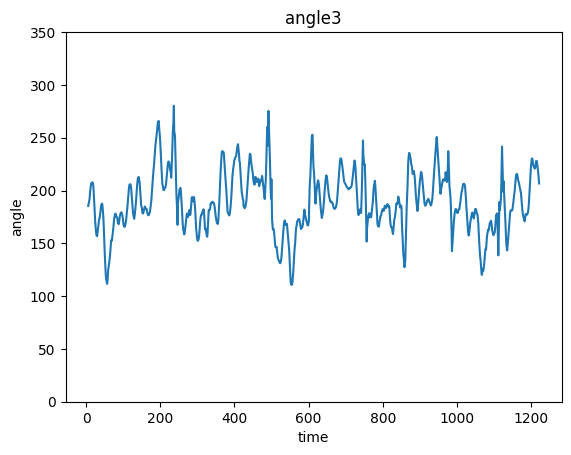

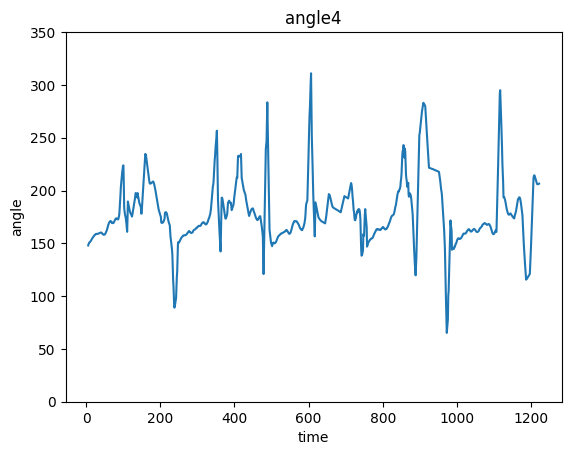

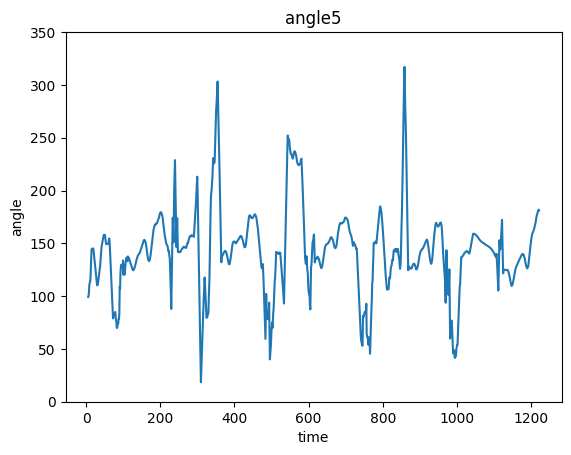

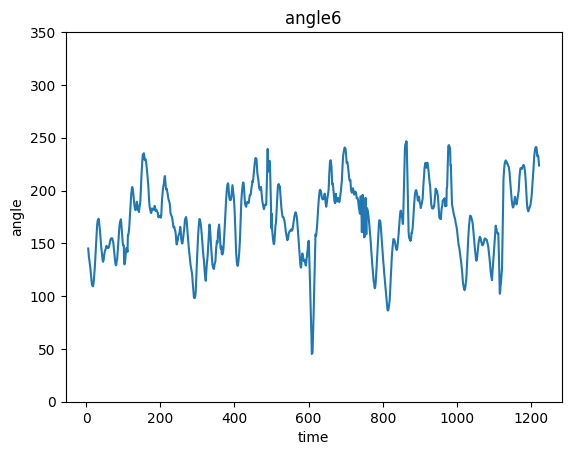

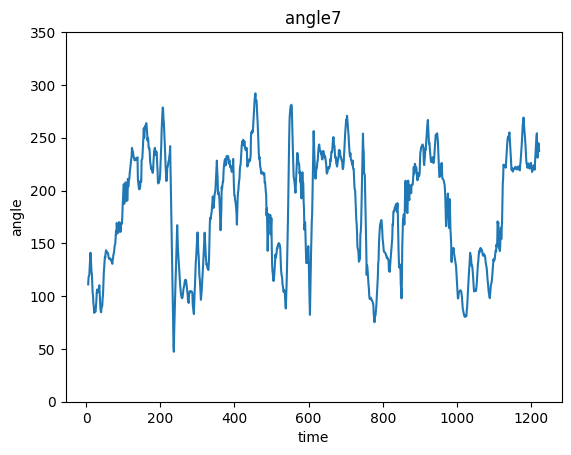

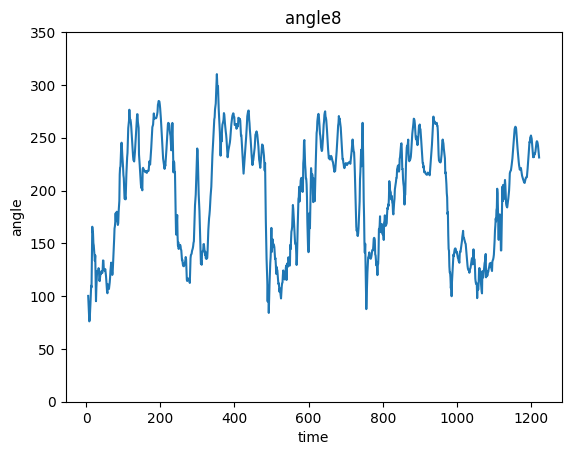

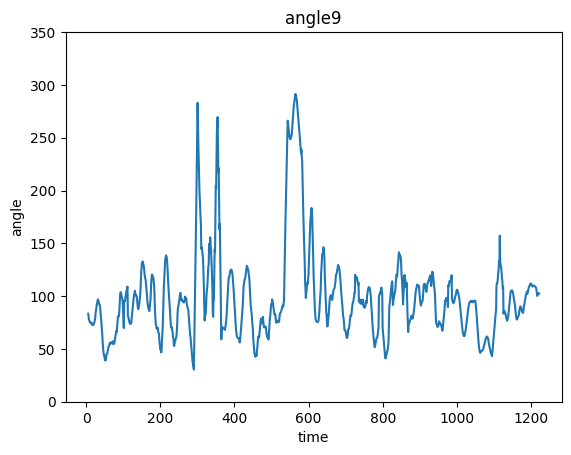

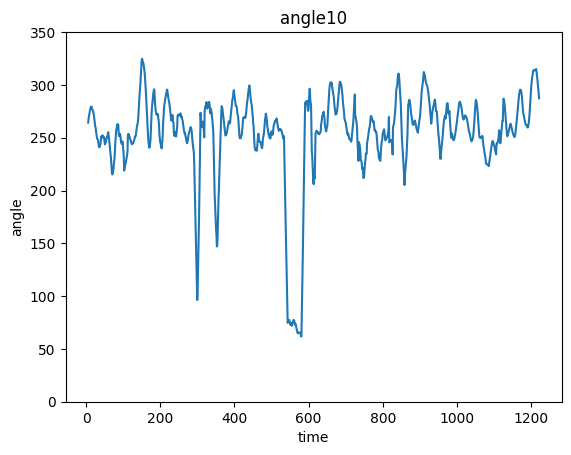

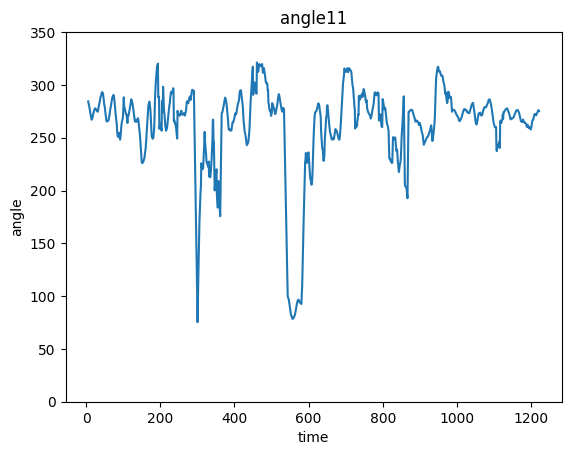

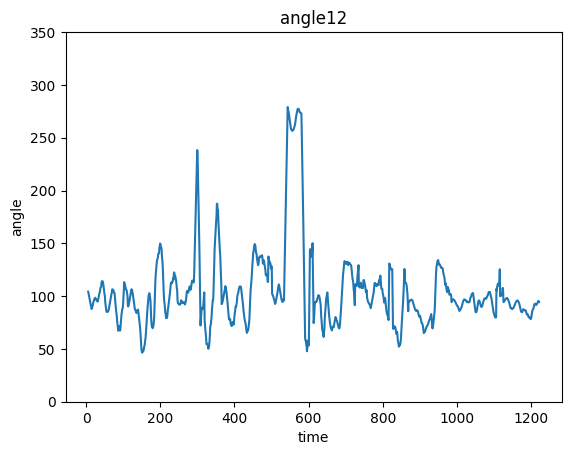

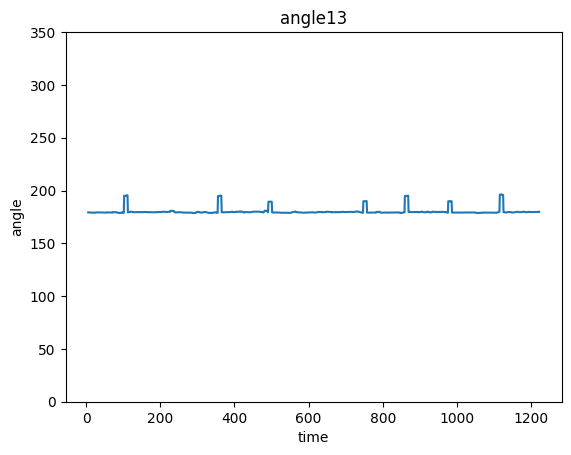

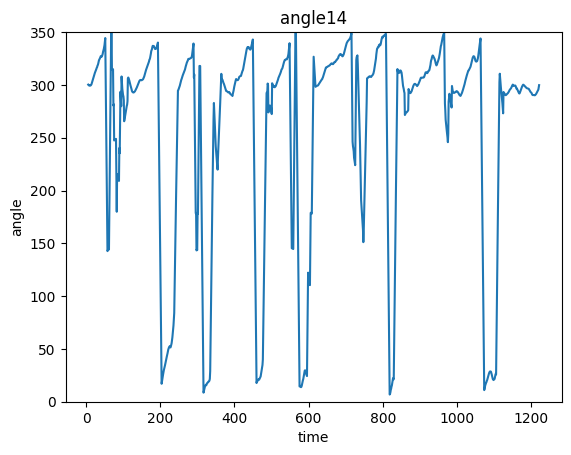

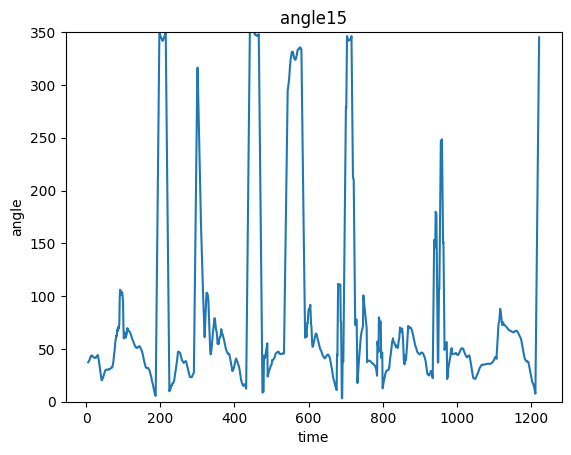

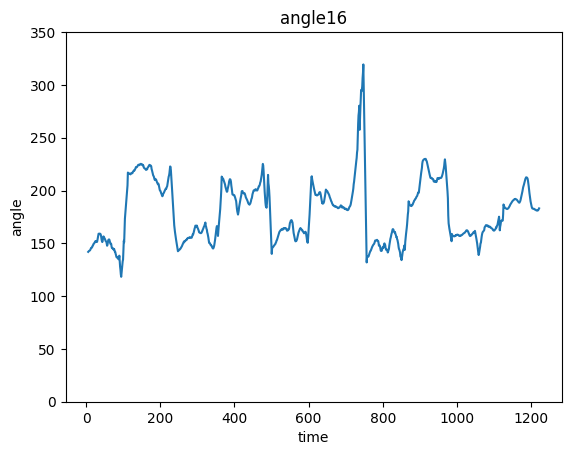

In [123]:

for columns in ["angle1","angle2","angle3","angle4","angle5","angle6","angle7","angle8","angle9","angle10","angle11","angle12","angle13","angle14","angle15","angle16"]:
    plt.plot(df_filtered['count'], df_filtered[columns])
    plt.title(columns)
    plt.xlabel('time')
    plt.ylabel('angle')
    plt.ylim(0,350)
    plt.show()

# obtain the joint coordinates w.r.t. the camera and plot

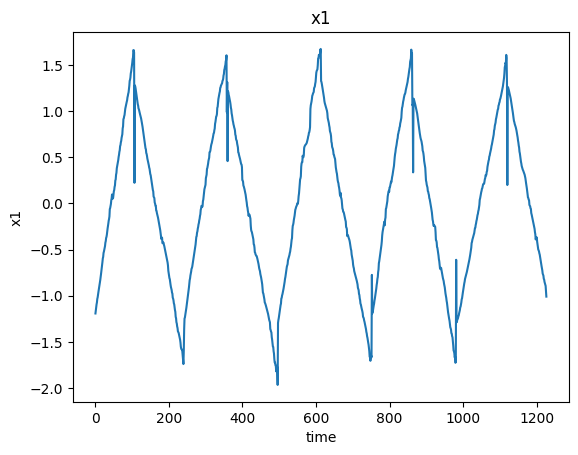

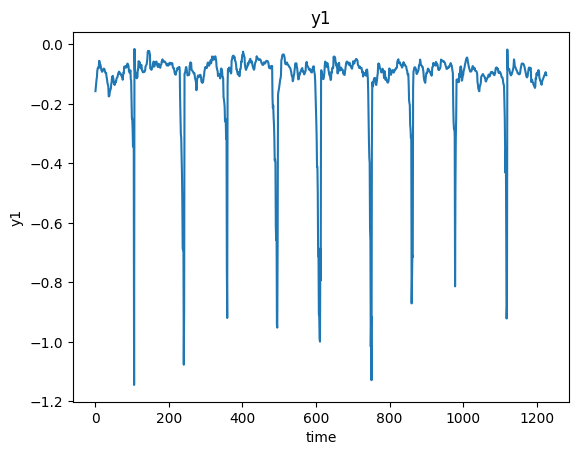

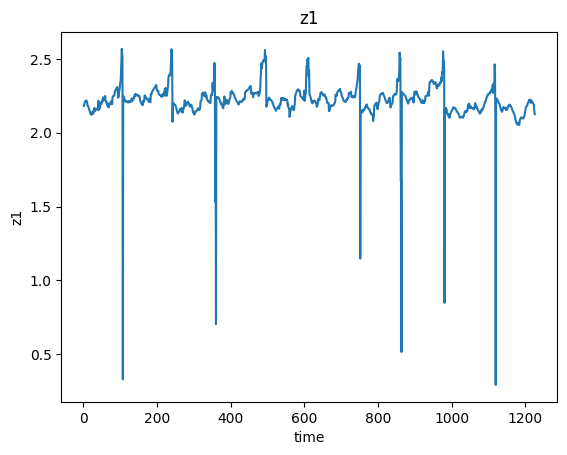

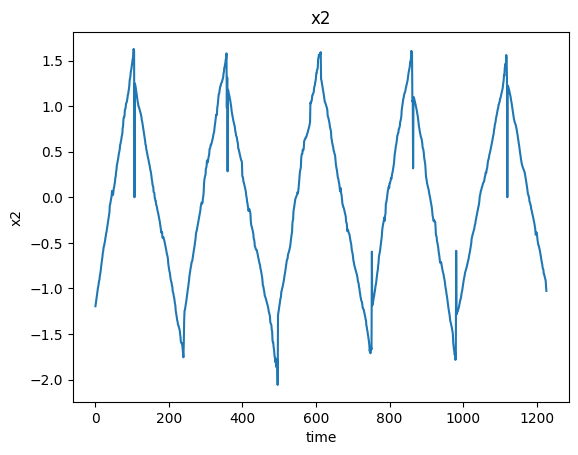

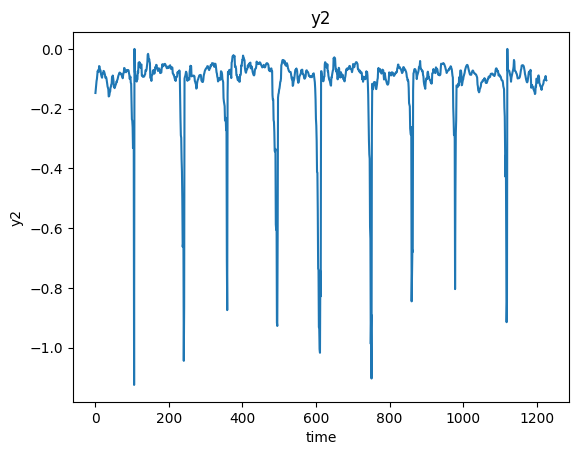

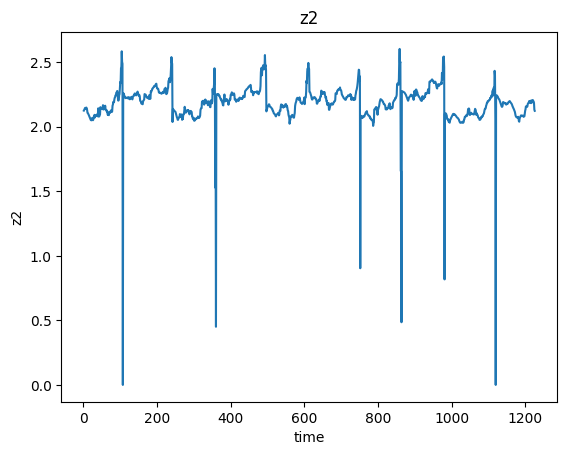

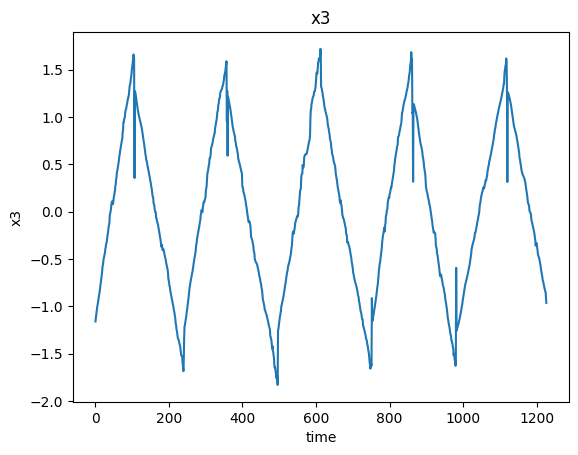

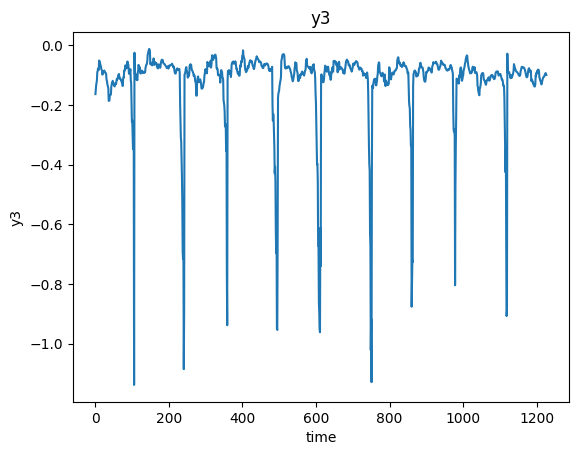

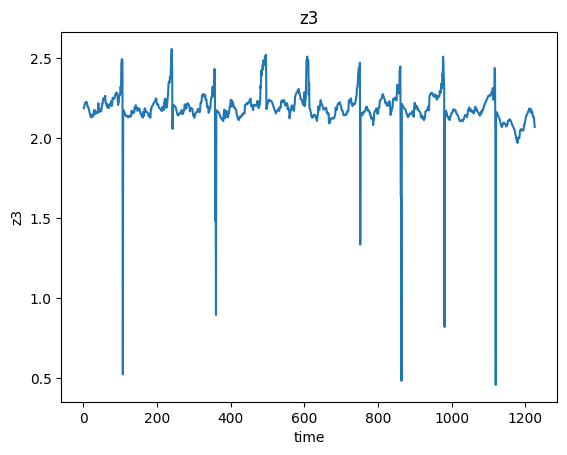

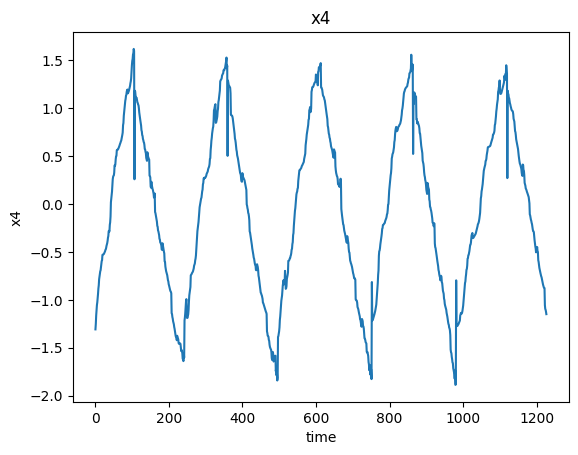

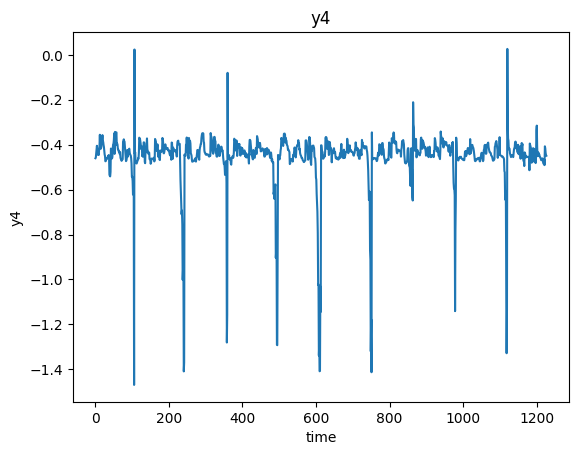

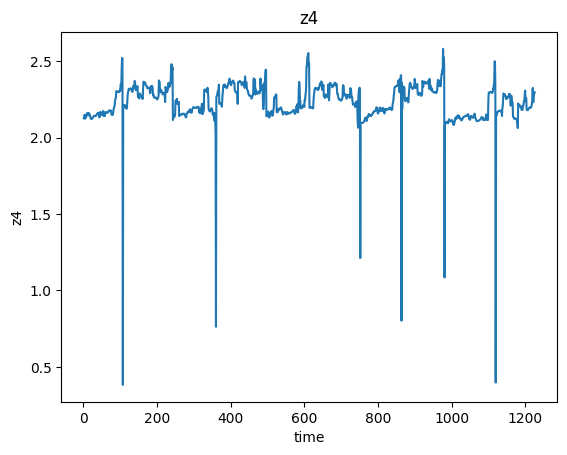

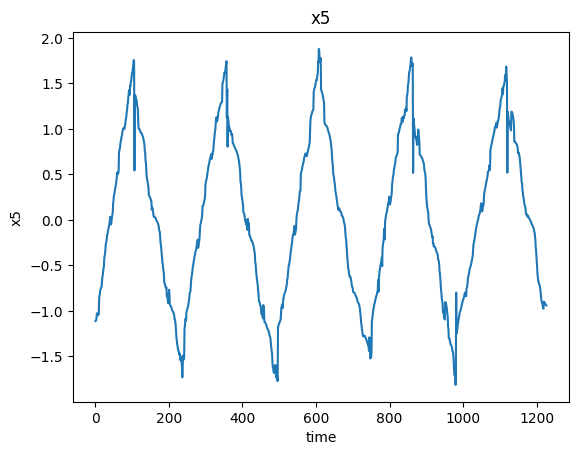

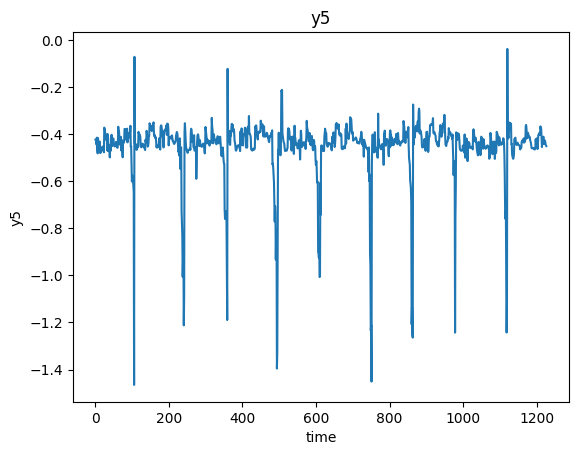

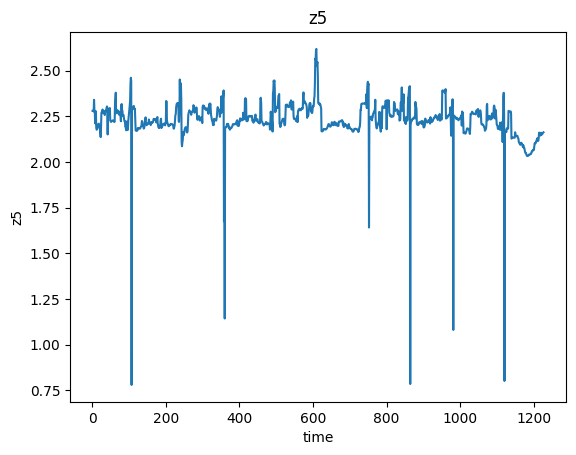

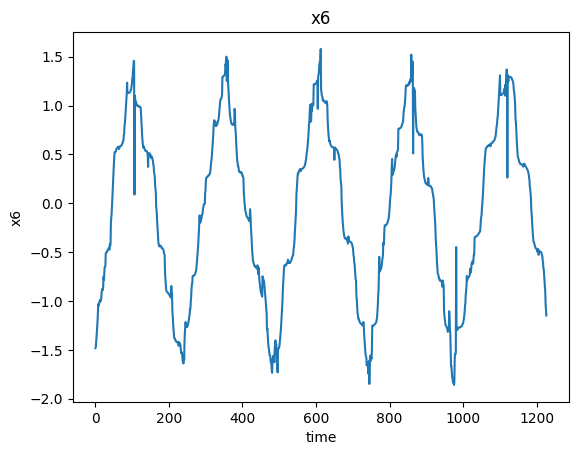

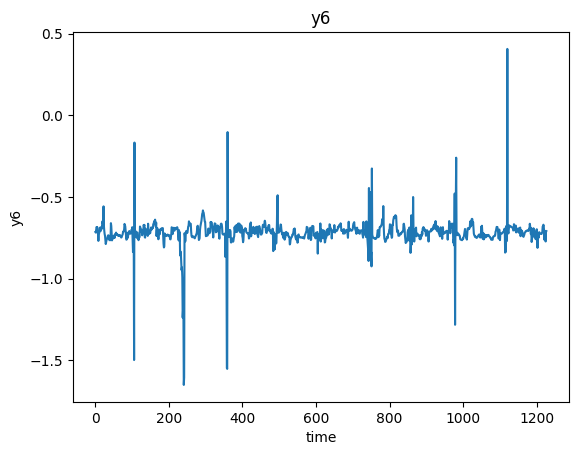

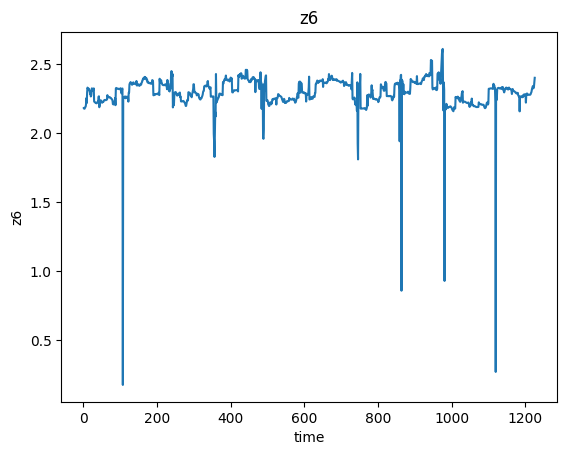

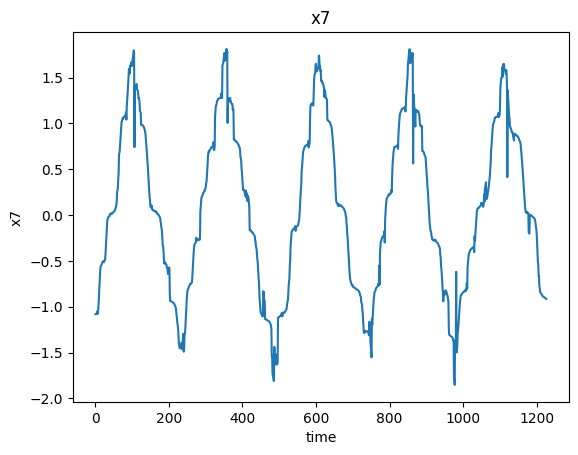

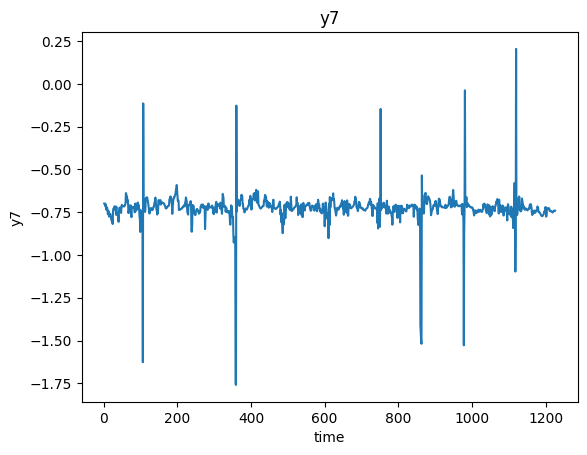

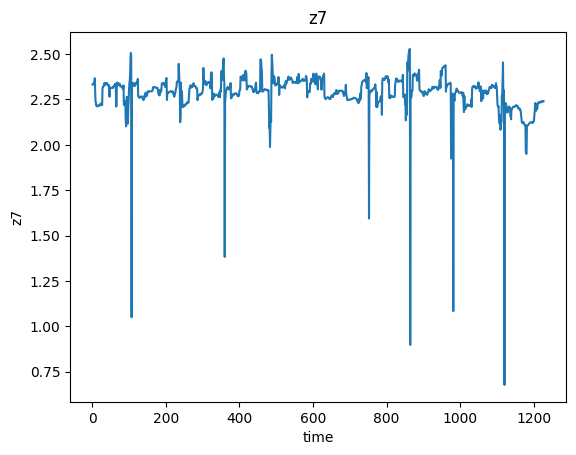

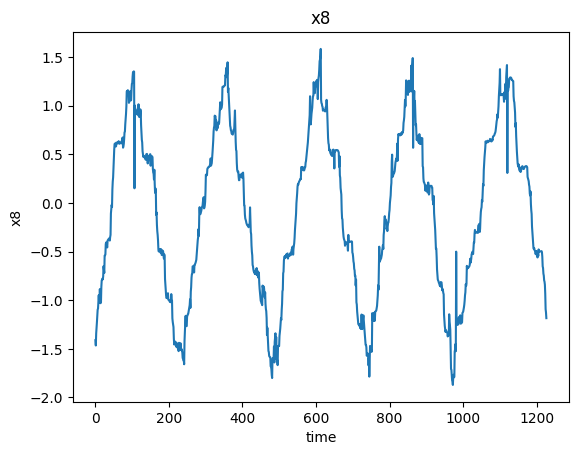

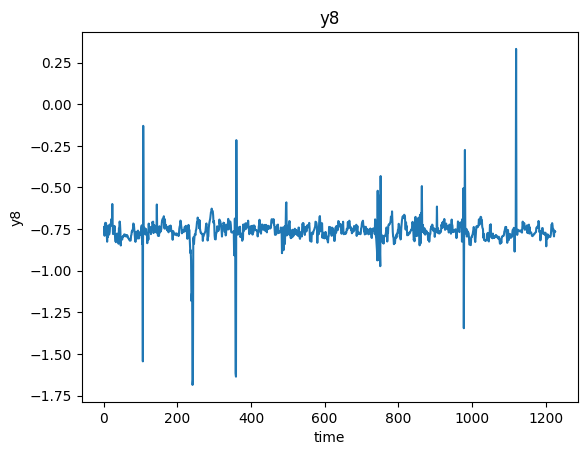

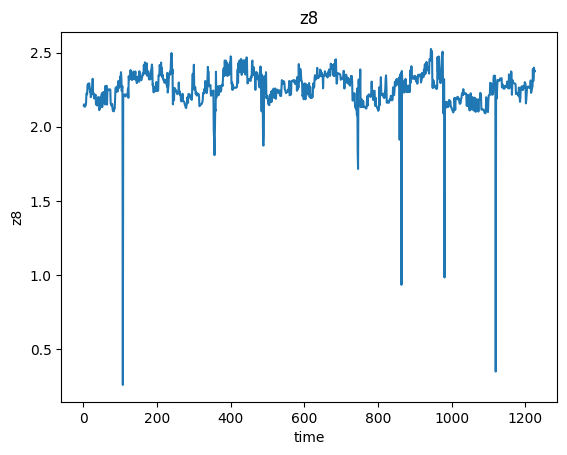

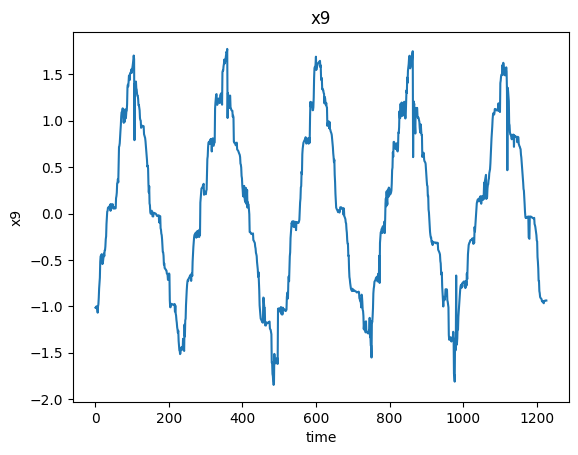

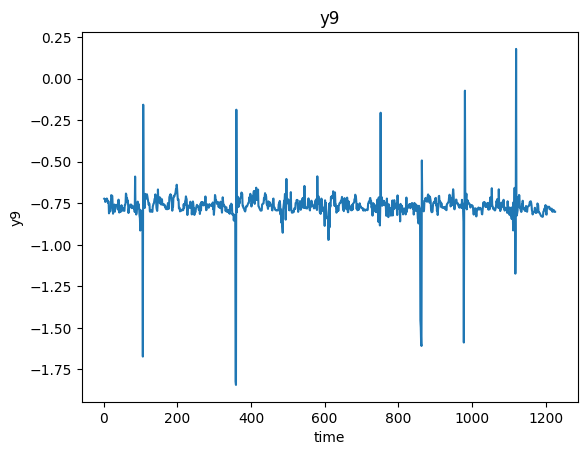

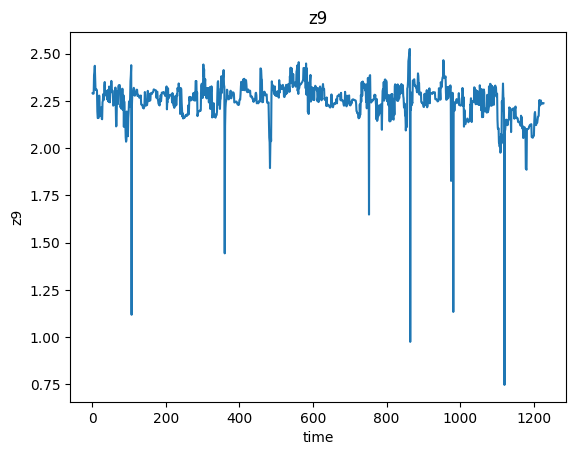

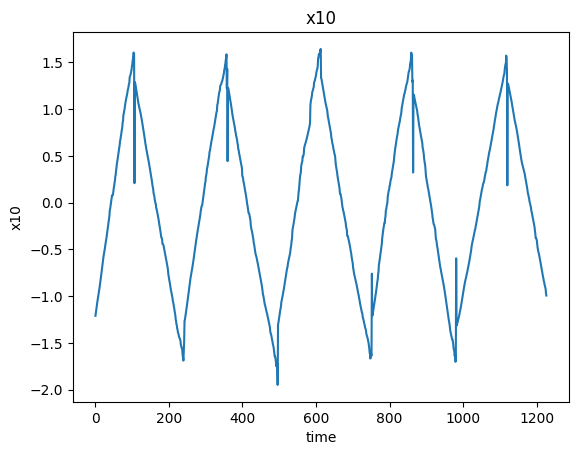

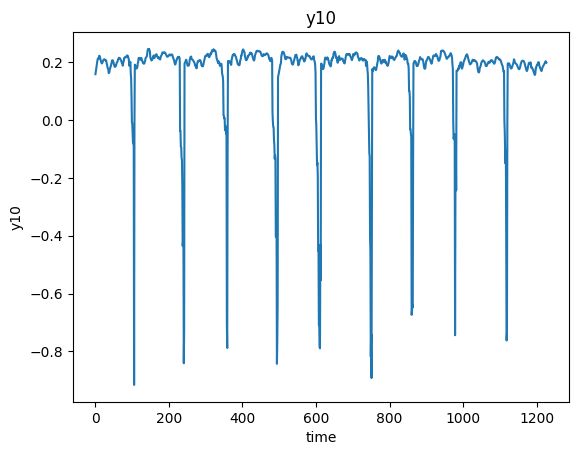

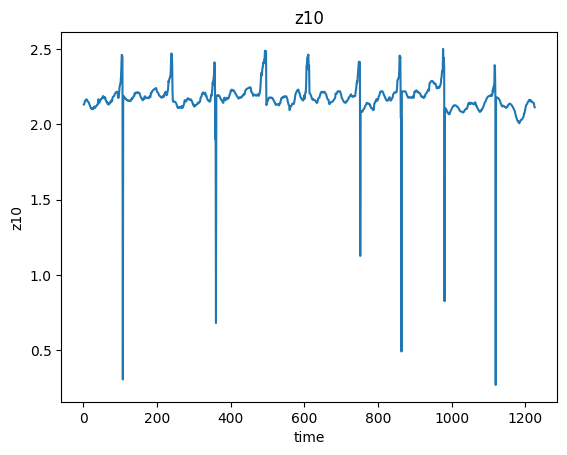

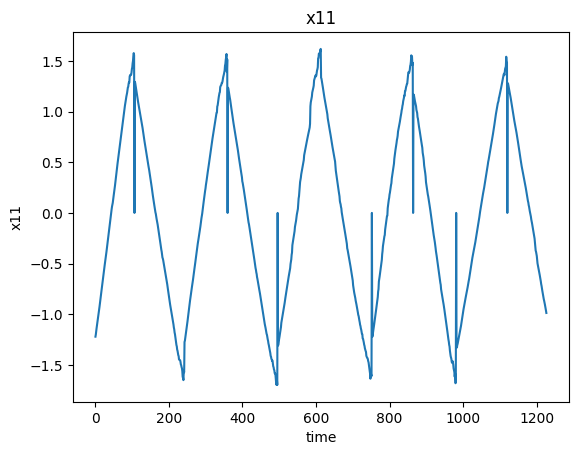

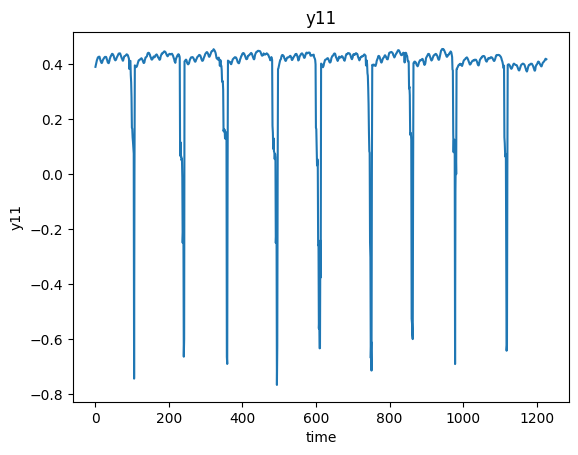

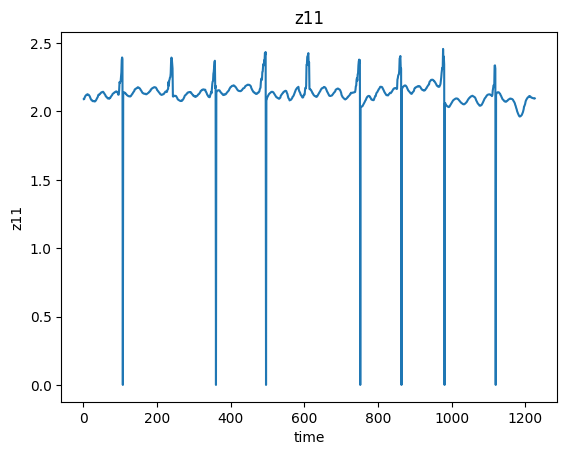

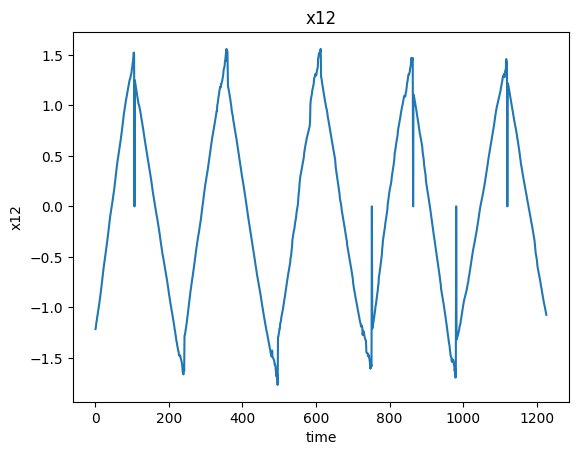

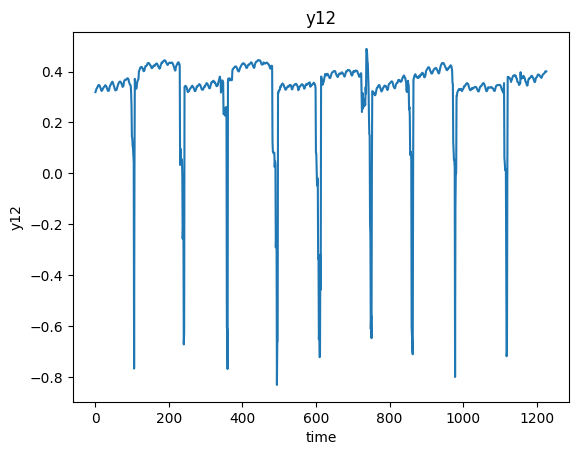

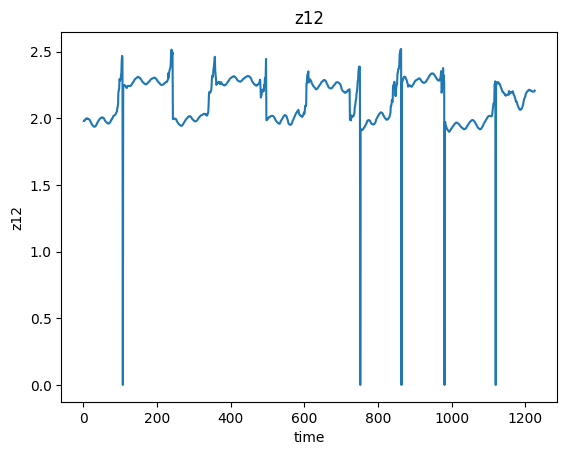

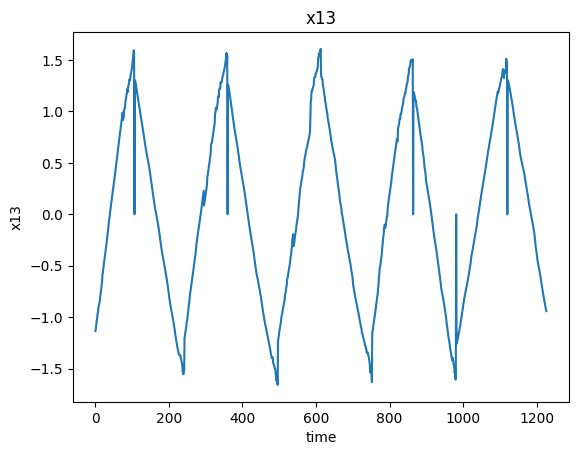

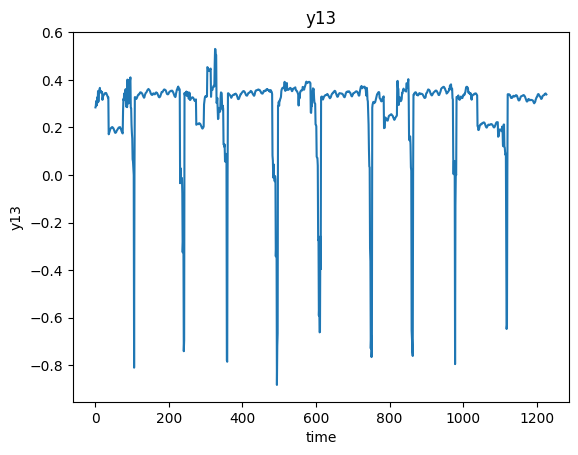

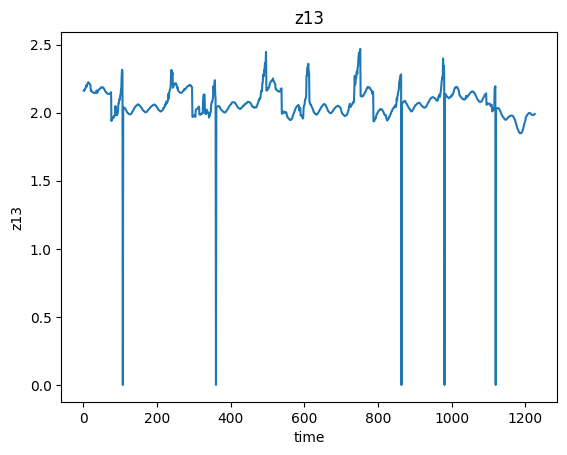

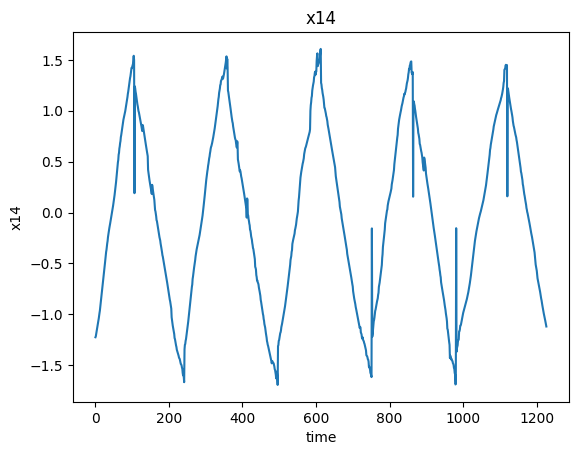

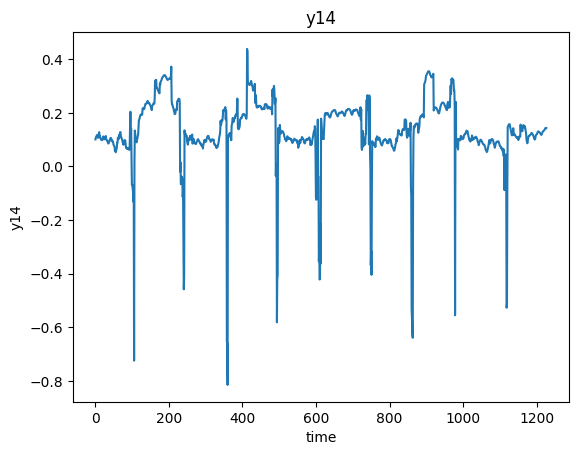

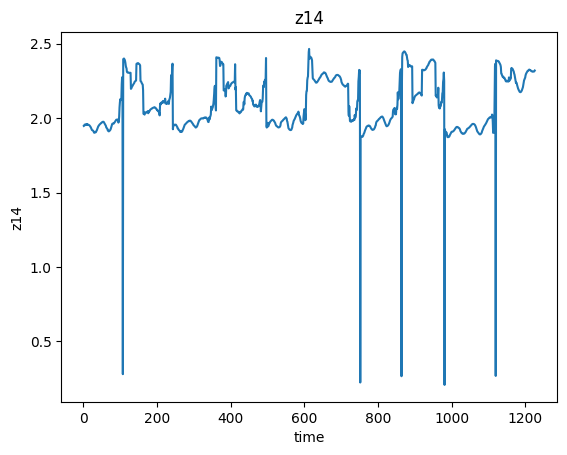

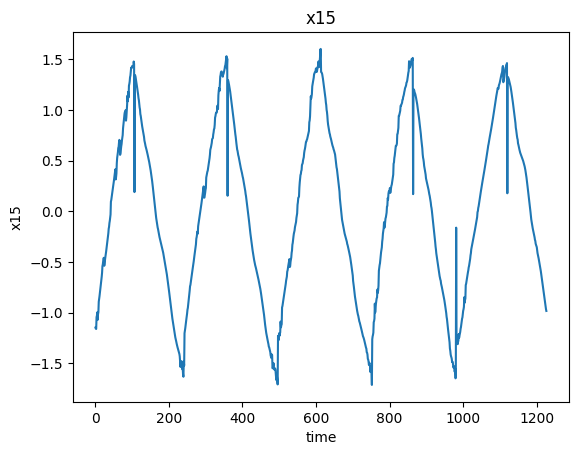

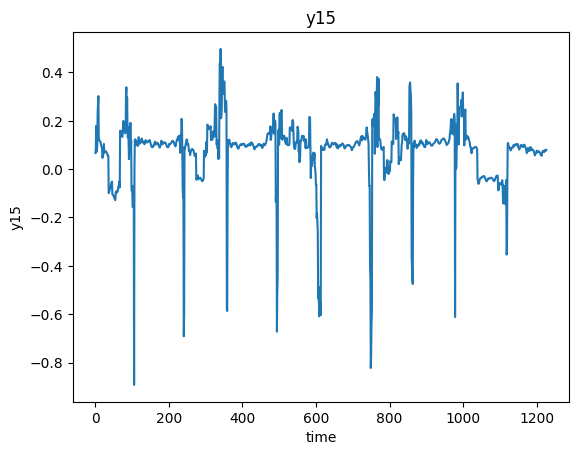

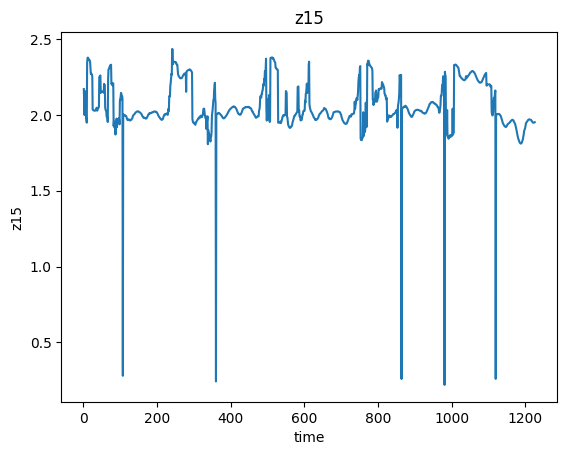

In [152]:
df_temp3 = pd.read_csv(r"G:\Academic Folders\FYP\walking_final\normal_walk_1.csv")

for columns in ["x1","y1","z1","x2","y2","z2","x3","y3","z3","x4","y4","z4","x5","y5","z5","x6","y6","z6","x7","y7","z7","x8","y8","z8","x9","y9","z9","x10","y10","z10","x11","y11","z11","x12","y12","z12","x13","y13","z13","x14","y14","z14","x15","y15","z15"]:
    plt.plot(df_temp3['count'], df_temp3[columns])
    plt.title(columns)
    plt.xlabel('time')
    plt.ylabel(columns)
    #plt.ylim(0,350)
    plt.savefig(columns)
    plt.show()
    #plt.savefig(columns)

# obtain joint coordinates w.r.t. the spine base

In [145]:
df_temp2 = pd.read_csv(r"G:\Academic Folders\FYP\walking_final\normal_walk_1.csv")
for j in ["x2","x3","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15"]:
    for i, row in df_temp2.iterrows():
        # Get the coordinates of the spine base for this row
        spine_base_x = row['x1']
        # Subtract the spine base coordinates from each joint's coordinates in this row
        df_temp2.at[i, j] = df_temp2.at[i, j] - spine_base_x

for j in ["y2","y3","y4","y5","y6","y7","y8","y9","y10","y11","y12","y13","y14","y15"]:
    for i, row in df_temp2.iterrows():
        # Get the coordinates of the spine base for this row
        spine_base_y = row['y1']
        # Subtract the spine base coordinates from each joint's coordinates in this row
        df_temp2.at[i, j] = df_temp2.at[i, j] - spine_base_y

for j in ["z2","z3","z4","z5","z6","z7","z8","z9","z10","z11","z12","z13","z14","z15"]:
    for i, row in df_temp2.iterrows():
        # Get the coordinates of the spine base for this row
        spine_base_z = row['z1']
        # Subtract the spine base coordinates from each joint's coordinates in this row
        df_temp2.at[i, j] = df_temp2.at[i, j] - spine_base_z
        
# Save the transformed CSV file
df_temp2.to_csv('skeleton_joints_transformed.csv', index=False)

# plot graphs of coordinates (w.r.t. the spine base)

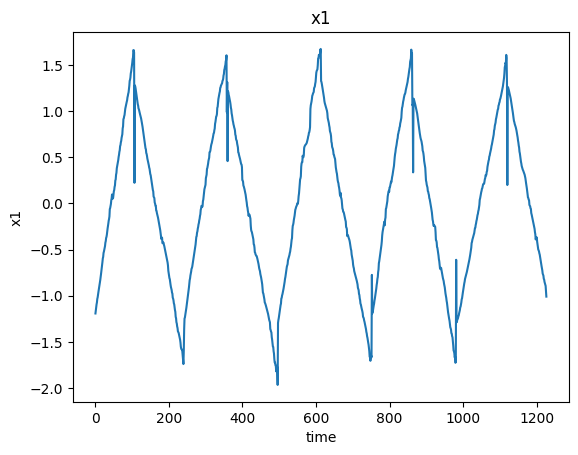

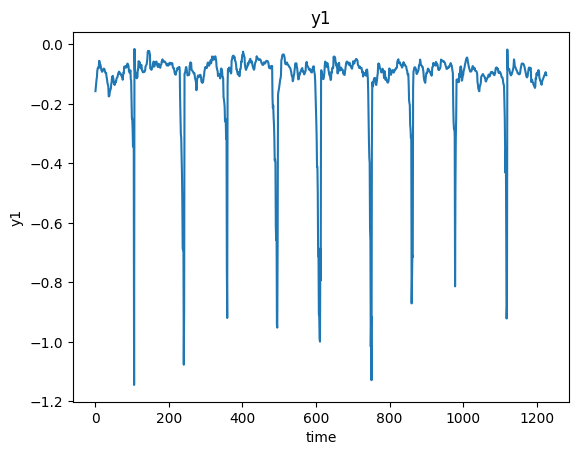

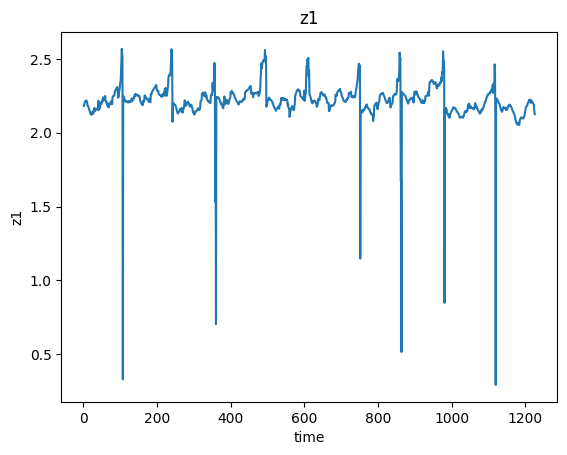

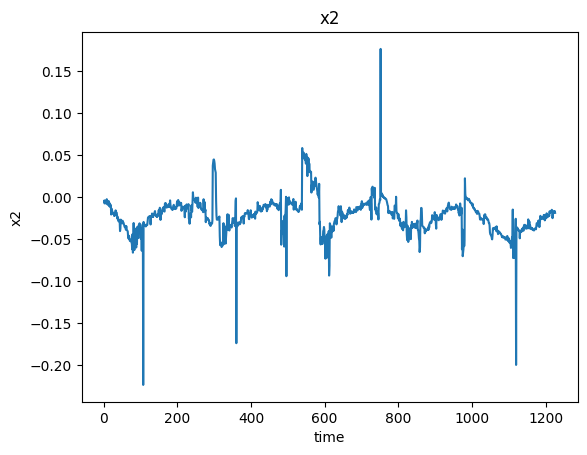

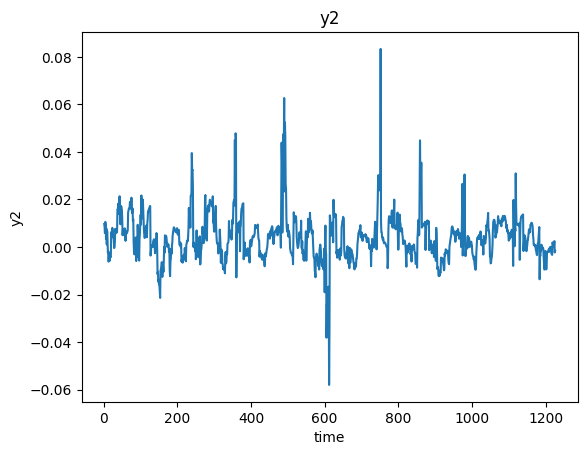

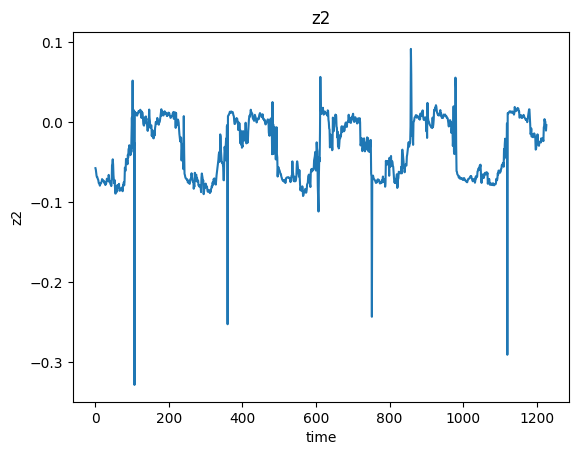

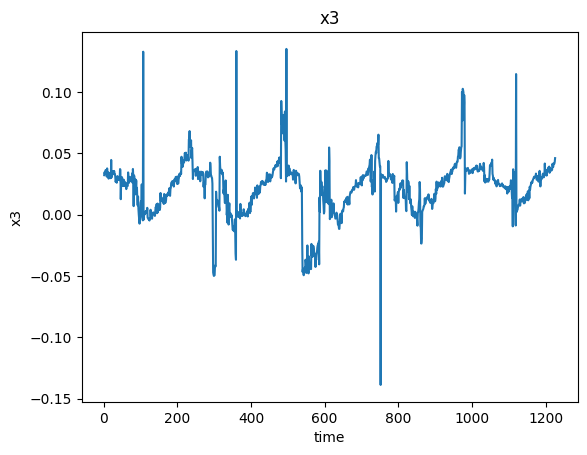

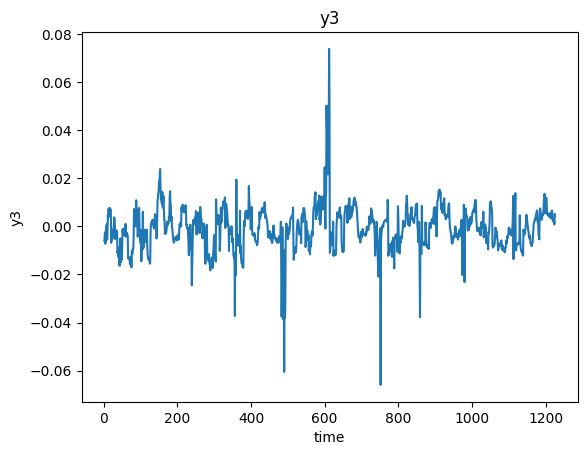

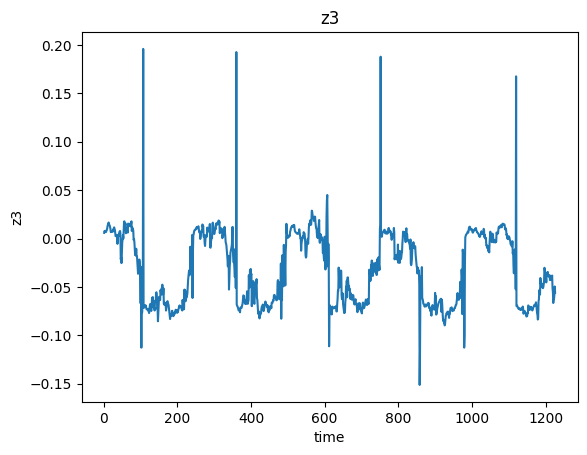

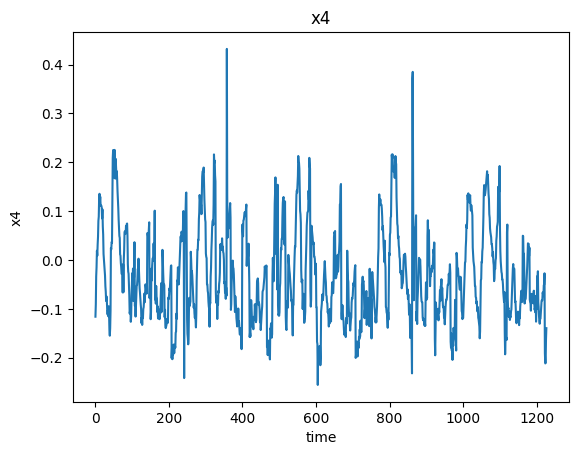

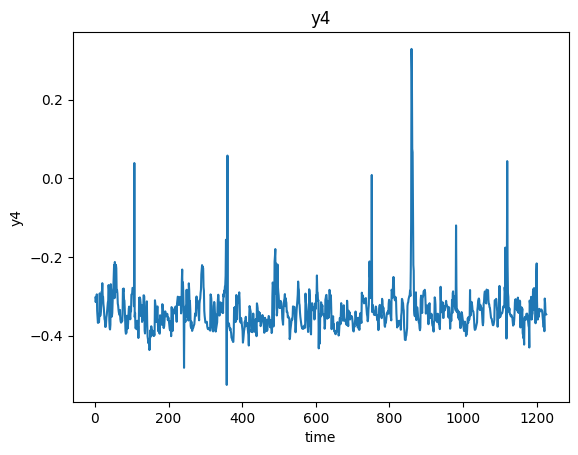

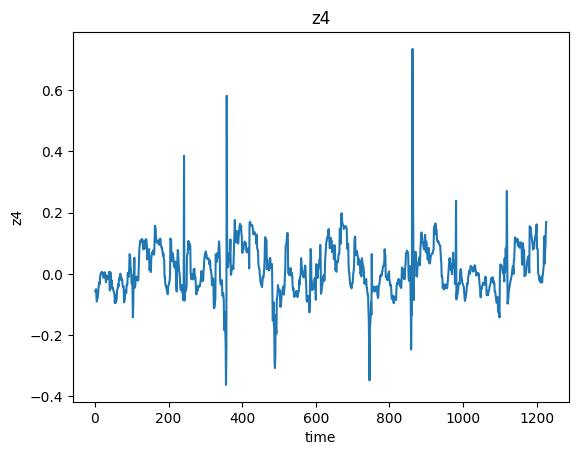

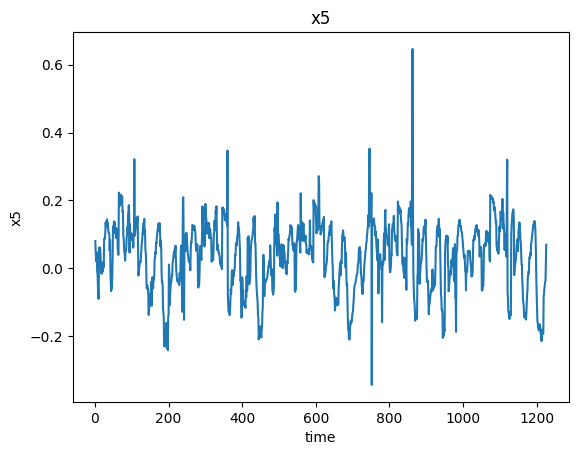

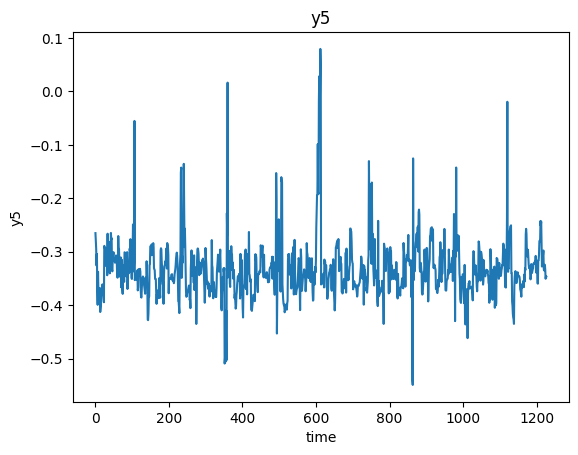

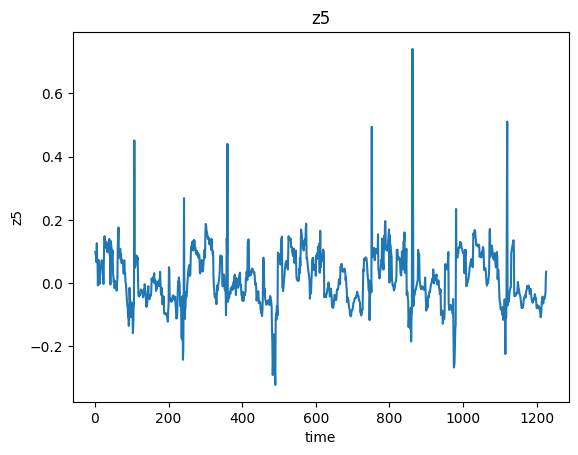

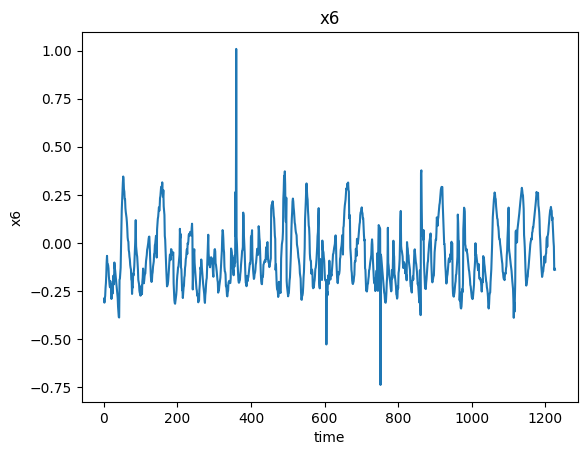

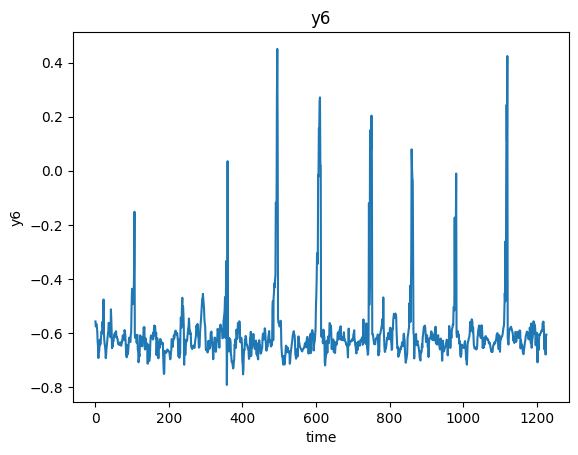

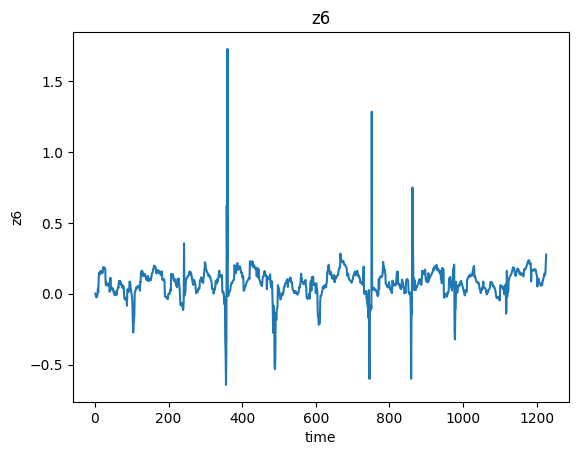

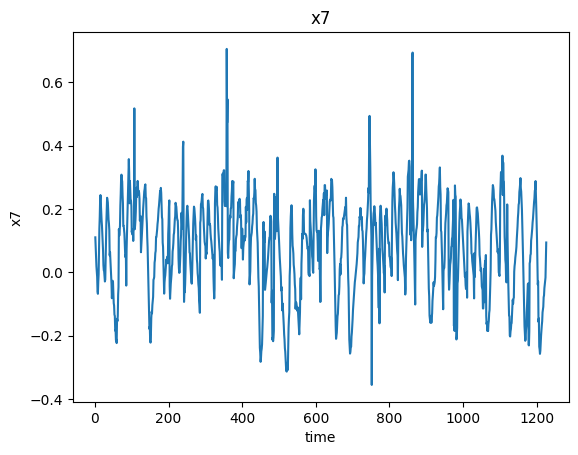

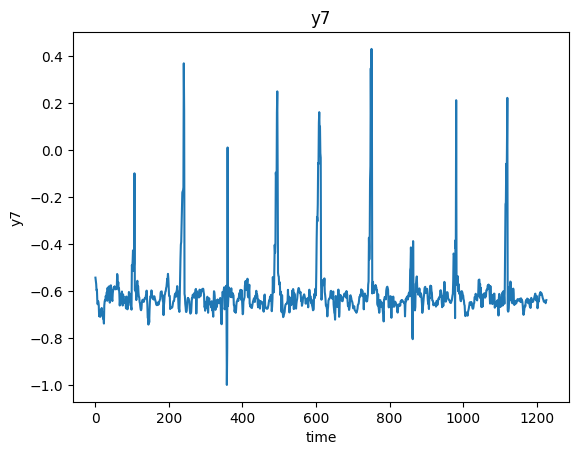

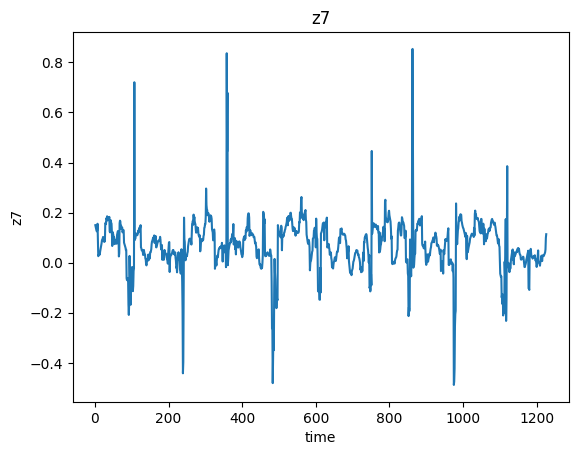

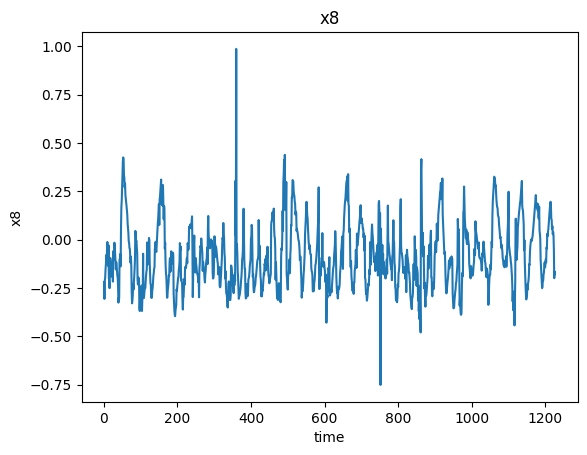

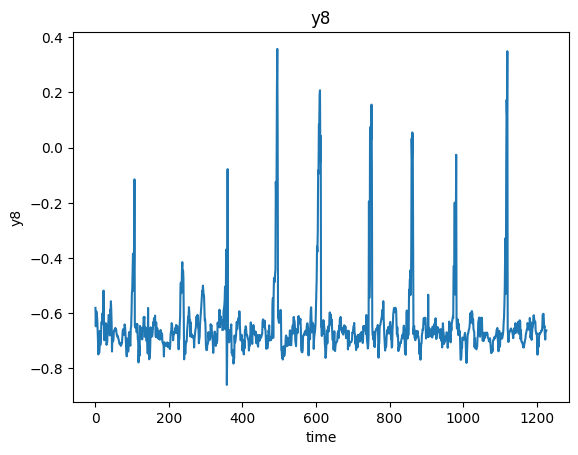

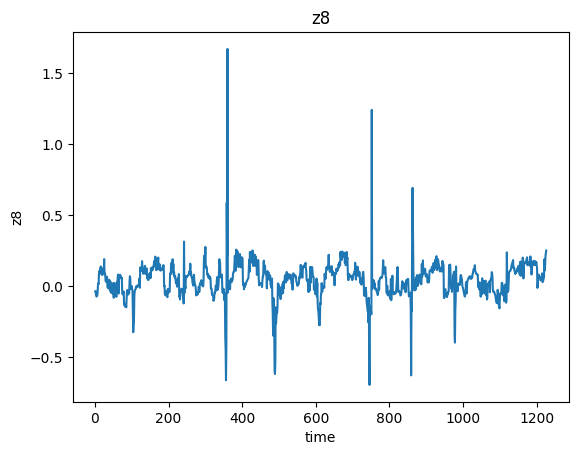

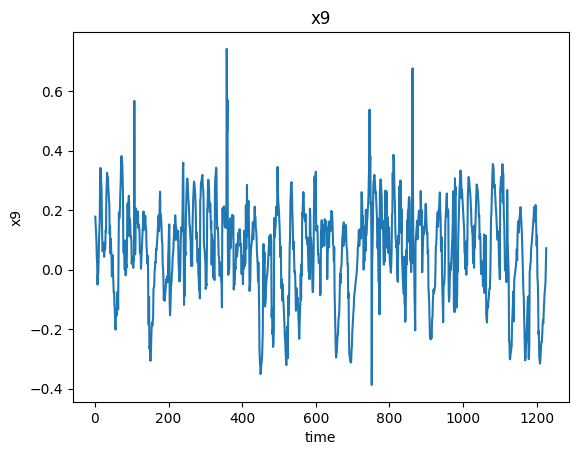

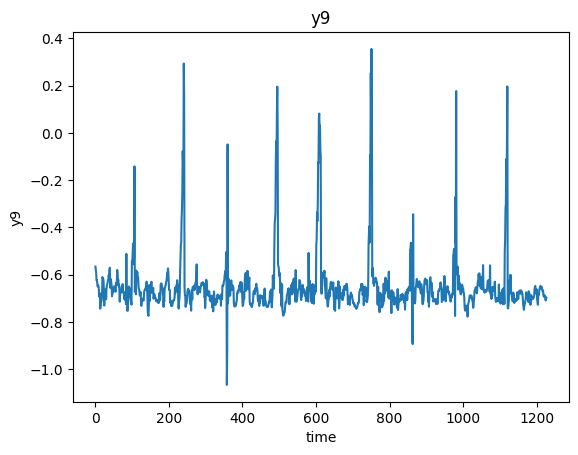

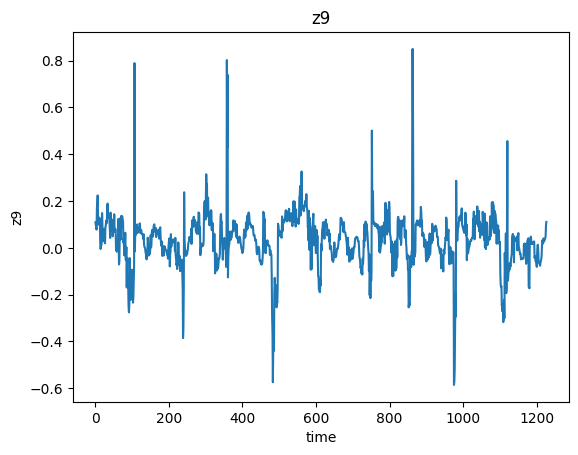

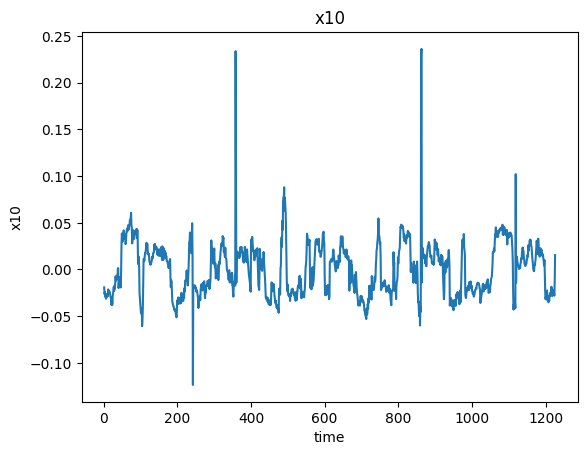

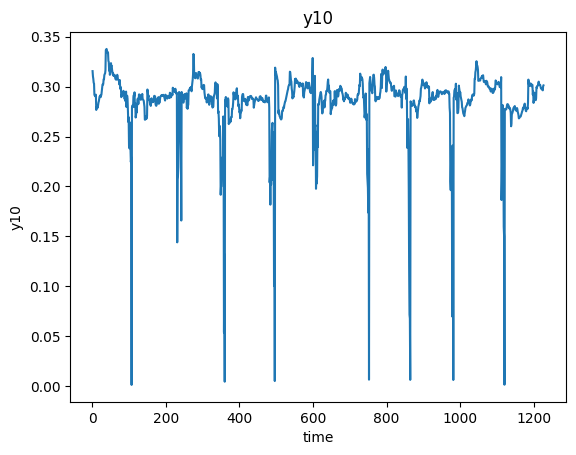

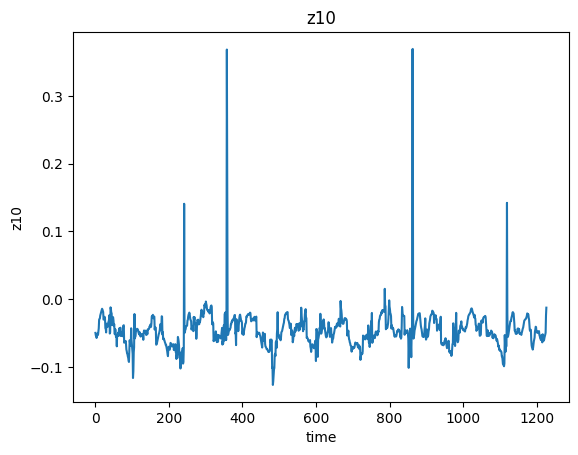

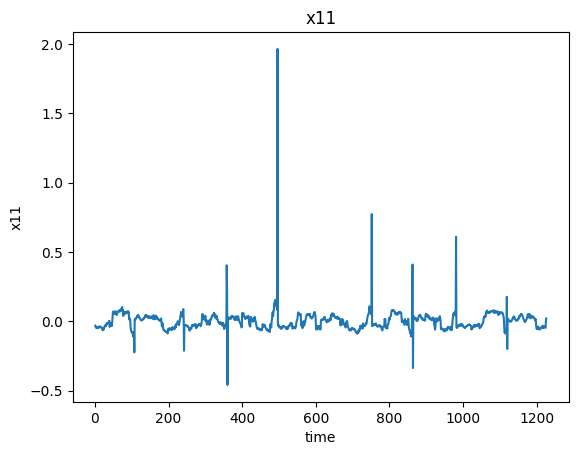

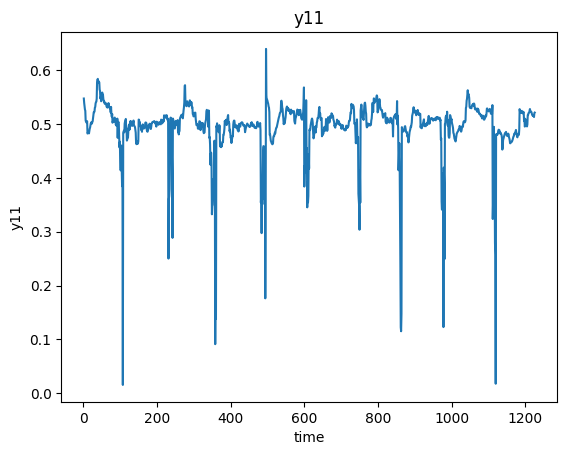

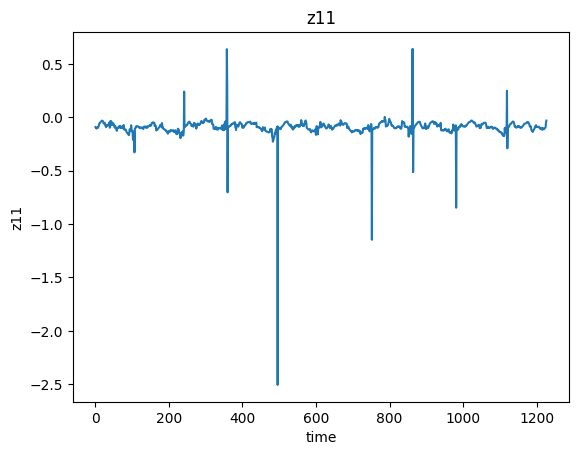

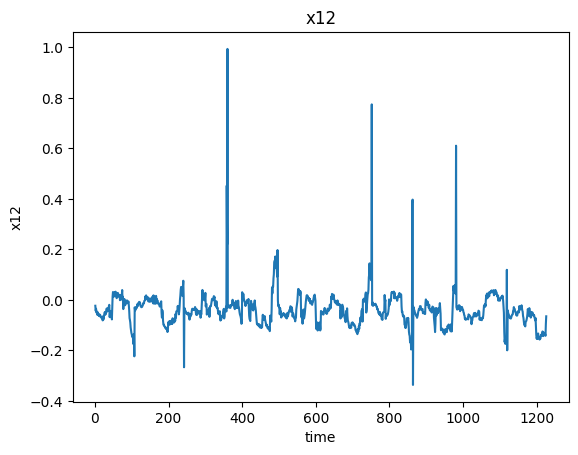

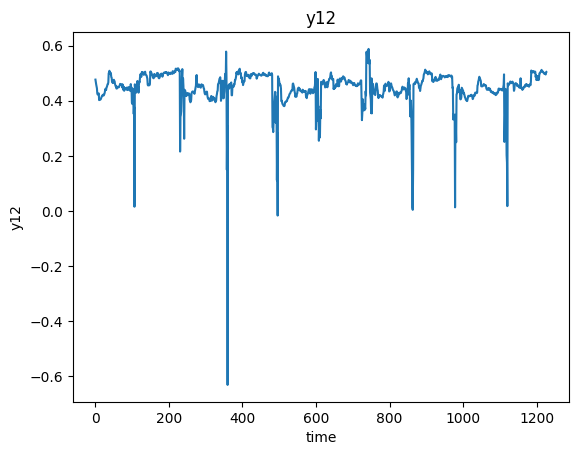

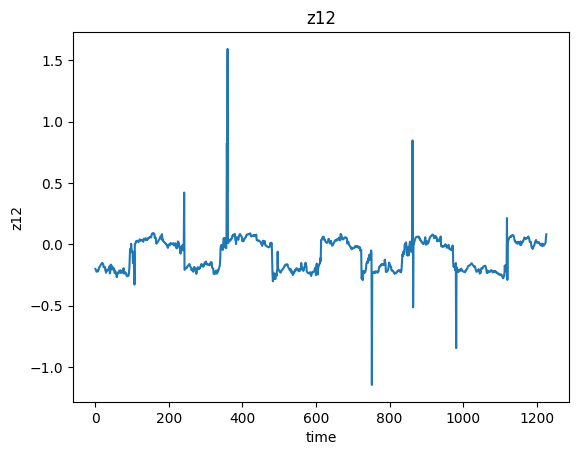

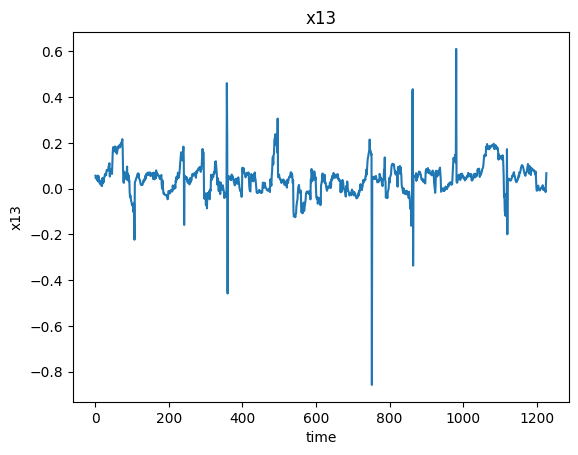

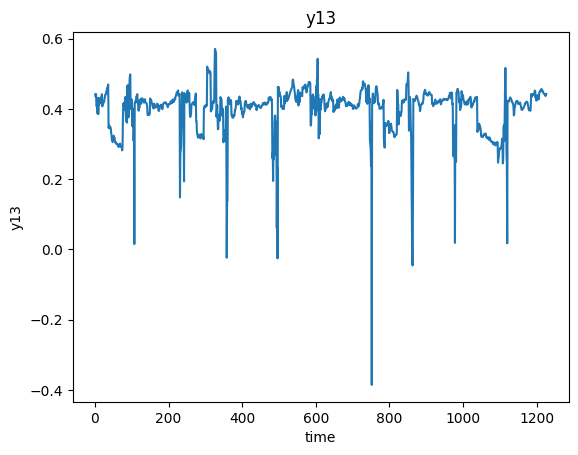

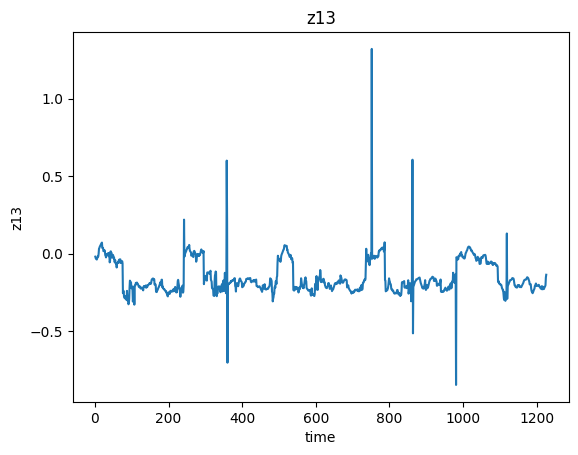

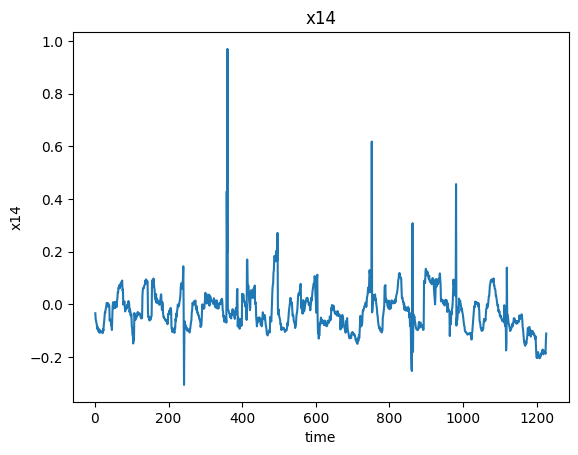

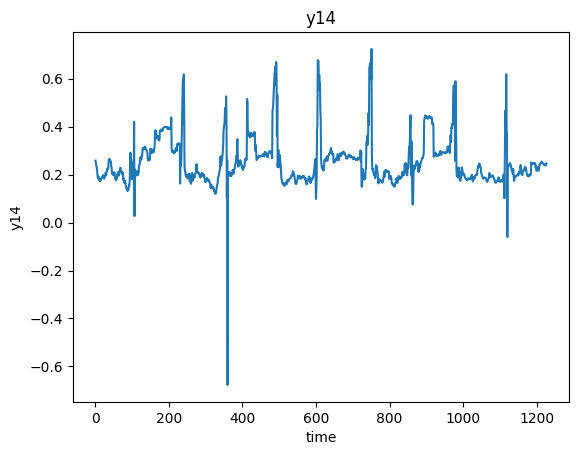

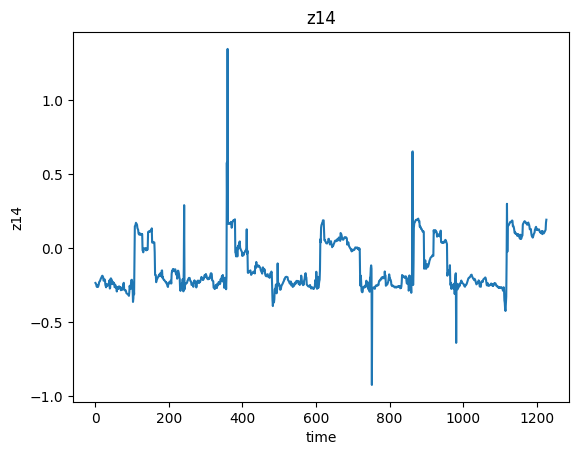

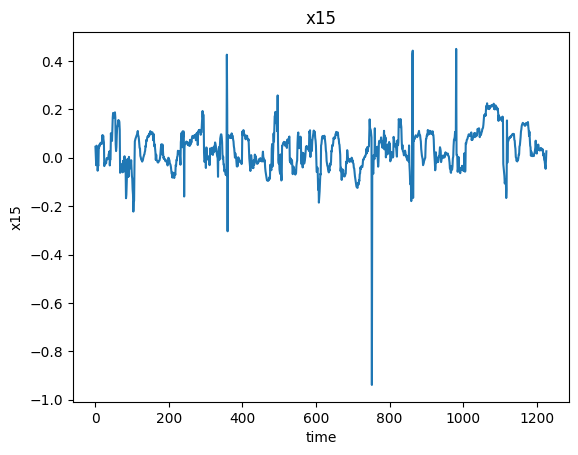

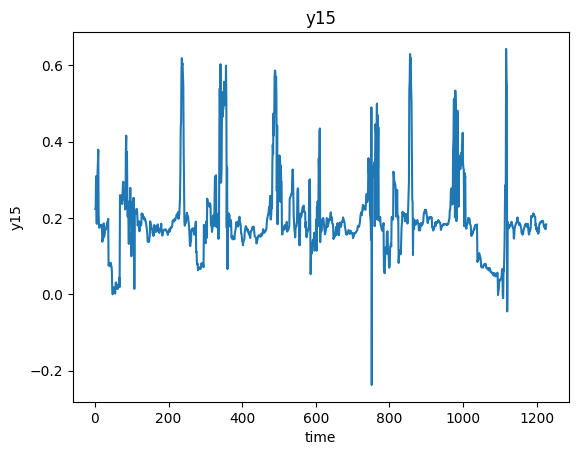

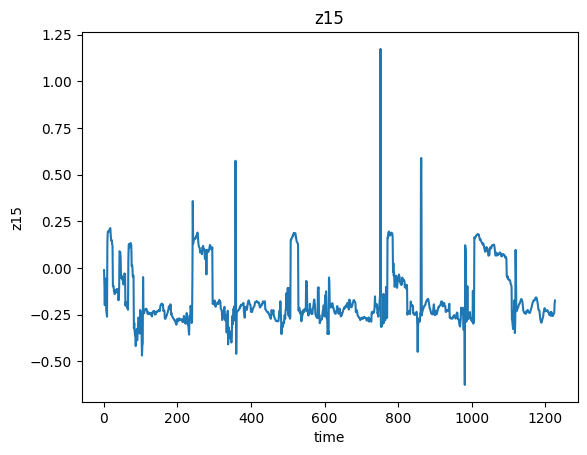

In [155]:
df3 = pd.read_csv(r'skeleton_joints_transformed.csv')
for columns in ["x1","y1","z1","x2","y2","z2","x3","y3","z3","x4","y4","z4","x5","y5","z5","x6","y6","z6","x7","y7","z7","x8","y8","z8","x9","y9","z9","x10","y10","z10","x11","y11","z11","x12","y12","z12","x13","y13","z13","x14","y14","z14","x15","y15","z15"]:
    plt.plot(df3['count'], df3[columns])
    plt.title(columns)
    plt.xlabel('time')
    plt.ylabel(columns)
    plt.savefig(columns)
    #plt.ylim(0,350)
    plt.show()

# joint velocities of left hip wrt the spine base

In [ ]:
#intAngle3 = int("angle3")

grad = np.gradient(df3["x2"],1/30)
#print(grad)
# add the gradient to the data as a new column
df3['Gradient'] = grad
#print(len(person1_df_normal))
#print(len(grad))

# save the data to a new CSV file
person1_df_normal.to_csv('leftHipvelocity.csv', index=False)